# Homework 1
In this homework, we will have you train some convolutional neural networks! We will start with a small dataset, and then work our way up to ImageNet!

For this homework we will train a classifier for Tiny Imagenet which you can read about here https://tiny-imagenet.herokuapp.com/ but don't bother downloading it just yet.

A note on file paths: Last homework, we used the homework1 folder. That was a mistake as it was technically homework 0. You may want to rename the folder from last time to homework0 before you begin.

# Part 0: Initial Setup
You should recognize this code from last time.


In [13]:
# This is code to download and install pytorch
import os
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu90' if os.path.exists('/opt/bin/nvidia-smi') else 'cpu'
!pip install http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

import torch
print('Version', torch.__version__)
print('CUDA enabled:', torch.cuda.is_available())

    100% |████████████████████████████████| 519.5MB 8.5MB/s eta 0:00:011
mkl-random 1.0.1 requires cython, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
('Version', '0.4.1')
('CUDA enabled:', False)


In [90]:
from google.colab import drive
drive.mount('/gdrive')
!ls /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
'My Drive'


# Part 1: Upload the Dataset
Run this code to navigate to the BASE_PATH directory and upload the homework1.tar file inside the BASE_PATH, then extract it.

Have a look at pt_util. We moved some of the useful functions out of the python notebook to make it less cluttered, and added a few more useful functions.

I made the BASE_PATH and DATA_PATH variables so you don't have to copy the same strings all over the place if you want to move the locations of the files around.


In [3]:
BASE_PATH = './'
if not os.path.exists(BASE_PATH):
    os.makedirs(BASE_PATH)
DATA_PATH = BASE_PATH + 'tiny_imagenet/'

!pwd
!ls
os.chdir(BASE_PATH)
if not os.path.exists(DATA_PATH + 'train.h5'):
    !wget http://pjreddie.com/media/files/homework1.tar
    !tar -xvf homework1.tar
    !rm homework1.tar
#os.chdir('/content')

/home/dericp/workspace/uw/cse599g1/dl-hw1/notebook
homework1_colab.ipynb  imagenet128.tar	pt_util.py   tiny_imagenet
imagenet128	       imagenet_full	pt_util.pyc


In [4]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
import h5py
import sys
sys.path.append(BASE_PATH)
import pt_util
import glob

# Part 2: Defining the Network
We're giving you no instructions on this part. Welcome to deep learning research! See if you can get above 40% accuracy. You probably want to use the Cross Entropy error again, but who knows, maybe you can find a better loss function. We will give you a few hints of things to try. Have a look at https://github.com/pytorch/examples/blob/master/mnist/main.py for a basic neural network implementation.


- Activation functions other than ReLU
- Batch Norm
- Dropout
- Residual connections

Additionally, the current saving function always saves the latest results. You may want to modify it to only save the results if they have the highest test accuracy. Please make this modification.



In [5]:


class TinyImagenetNet(nn.Module):
    def __init__(self):
        super(TinyImagenetNet, self).__init__()
        # TODO define the layers
        #raise NotImplementedError('Need to define the layers for your network')
        super(TinyImagenetNet, self).__init__()
        self.best_accuracy = 0
        
        # conv_net copied over
#         self.conv1 = nn.Conv2d(3, 8, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(1024, 200)

        # vgg 16
#         self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
#         self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
#         self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
#         self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
#         self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
#         self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
#         self.conv7 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
#         self.conv8 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
#         self.conv9 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
#         self.conv10 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
#         self.conv11 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
#         self.conv12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
#         self.conv13 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
#         self.fc1 = nn.Linear(2048, 4096)
#         self.fc2 = nn.Linear(4096, 4096)
#         self.fc3 = nn.Linear(4096, 200)

        # darknet
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv1_bn = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv2_bn = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3_bn = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 64, kernel_size=1)
        self.conv4_bn = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv6_bn = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 128, kernel_size=1)
        self.conv7_bn = nn.BatchNorm2d(128)
        self.conv8 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv9_bn = nn.BatchNorm2d(512)
        self.conv10 = nn.Conv2d(512, 256, kernel_size=1)
        self.conv10_bn = nn.BatchNorm2d(256)
        self.conv11 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv11_bn = nn.BatchNorm2d(512)
        self.conv12 = nn.Conv2d(512, 256, kernel_size=1)
        self.conv12_bn = nn.BatchNorm2d(256)
        self.conv13 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv13_bn = nn.BatchNorm2d(512)
        
        self.conv14 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.conv14_bn = nn.BatchNorm2d(1024)
        self.conv15 = nn.Conv2d(1024, 512, kernel_size=1)
        self.conv15_bn = nn.BatchNorm2d(512)
        self.conv16 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.conv16_bn = nn.BatchNorm2d(1024)
        self.conv17 = nn.Conv2d(1024, 512, kernel_size=1)
        self.conv17_bn = nn.BatchNorm2d(512)
        self.conv18 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.conv18_bn = nn.BatchNorm2d(1024)
        self.conv19 = nn.Conv2d(1024, 200, kernel_size=1, padding=1)
        self.conv19_bn = nn.BatchNorm2d(200)

    def forward(self, x):
        # TODO define the forward pass
        #raise NotImplementedError('Need to define the forward pass')
        #print('initial shape', x.shape)
        
        # conv_net copied over
#         x = F.leaky_relu(F.max_pool2d(self.conv1(x), 3, stride=2, padding=1))
#         x = F.leaky_relu(F.max_pool2d(self.conv2(x), 3, stride=2, padding=1))
#         x = F.leaky_relu(F.max_pool2d(self.conv3(x), 3, stride=2, padding=1))
#         x = F.leaky_relu(F.max_pool2d(self.conv4(x), 3, stride=2, padding=1))
#         x = x.view(-1, 1024)
#         x = self.fc1(x)
#         x = F.log_softmax(x, dim=1)

        # vgg 16
#         x = F.leaky_relu(self.conv1(x))
#         x = F.leaky_relu(F.max_pool2d(self.conv2(x), 3, stride=2, padding=1))
#         x = F.leaky_relu(self.conv3(x))
#         x = F.leaky_relu(F.max_pool2d(self.conv4(x), 3, stride=2, padding=1))
#         x = F.leaky_relu(self.conv5(x))
#         x = F.leaky_relu(self.conv6(x))
#         x = F.leaky_relu(F.max_pool2d(self.conv7(x), 3, stride=2, padding=1))
#         x = F.leaky_relu(self.conv8(x))
#         x = F.leaky_relu(self.conv9(x))
#         x = F.leaky_relu(F.max_pool2d(self.conv10(x), 3, stride=2, padding=1))
#         x = F.leaky_relu(self.conv11(x))
#         x = F.leaky_relu(self.conv12(x))
#         x = F.leaky_relu(F.max_pool2d(self.conv13(x), 3, stride=2, padding=1))
#         #print('shape before fc', x.shape)
#         x = x.view(-1, 2048)
#         x = F.leaky_relu(self.fc1(x))
#         x = F.leaky_relu(self.fc2(x))
#         x = F.leaky_relu(self.fc3(x))
#         x = F.log_softmax(x, dim=1)

        # darknet
        x = F.leaky_relu(F.max_pool2d(self.conv1_bn(self.conv1(x)), 2, stride=2, padding=1))
        x = F.leaky_relu(F.max_pool2d(self.conv2_bn(self.conv2(x)), 2, stride=2, padding=1))
      
        x = F.leaky_relu(self.conv3_bn(self.conv3(x)))
        x = F.leaky_relu(self.conv4_bn(self.conv4(x)))
        x = F.leaky_relu(F.max_pool2d(self.conv5_bn(self.conv5(x)), 2, stride=2, padding=1))
        
        x = F.leaky_relu(self.conv6_bn(self.conv6(x)))
        x = F.leaky_relu(self.conv7_bn(self.conv7(x)))
        x = F.leaky_relu(F.max_pool2d(self.conv8_bn(self.conv8(x)), 2, stride=2, padding=1))
        
        x = F.leaky_relu(self.conv9_bn(self.conv9(x)))
        x = F.leaky_relu(self.conv10_bn(self.conv10(x)))
        x = F.leaky_relu(self.conv11_bn(self.conv11(x)))
        x = F.leaky_relu(self.conv12_bn(self.conv12(x)))
        x = F.leaky_relu(F.max_pool2d(self.conv13_bn(self.conv13(x)), 2, stride=2, padding=1))
        
        x = F.leaky_relu(self.conv14_bn(self.conv14(x)))
        x = F.leaky_relu(self.conv15_bn(self.conv15(x)))
        x = F.leaky_relu(self.conv16_bn(self.conv16(x)))
        x = F.leaky_relu(self.conv17_bn(self.conv17(x)))
        x = F.leaky_relu(self.conv18_bn(self.conv18(x)))
        x = F.leaky_relu(self.conv19_bn(self.conv19(x)))
        
        x = F.avg_pool2d(x, 5)
        x = x.view(-1, 200)
        x = F.log_softmax(x, dim=1)

        return x

    def loss(self, prediction, label, reduction='elementwise_mean'):
        loss_val = F.cross_entropy(prediction, label.squeeze(), reduction=reduction)
        return loss_val

    def save_model(self, file_path, num_to_keep=1):
        pt_util.save(self, file_path, num_to_keep)
        
    def save_best_model(self, accuracy, file_path, num_to_keep=1):
        # TODO save the model if it is the best
        #raise NotImplementedError('Need to implement save_best_model')
        if accuracy > self.best_accuracy:
          self.best_accuracy = accuracy
          self.save_model(file_path, num_to_keep)

    def load_model(self, file_path):
        pt_util.restore(self, file_path)

    def load_last_model(self, dir_path):
        return pt_util.restore_latest(self, dir_path)


This time we are giving you the train and test functions, but feel free to modify them if you want. 

You may need to return some additional information for the logging portion of this assignment.


In [113]:
import time
# returns the train loss of this particular epoch
def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = data.to(device), label.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = model.loss(output, label)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('{} Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                time.ctime(time.time()),
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
    return loss.item()

def test(model, device, test_loader, return_images=False, log_interval=None):
    model.eval()
    test_loss = 0
    correct = 0

    correct_images = []
    correct_values = []

    error_images = []
    predicted_values = []
    gt_values = []
    with torch.no_grad():
        for batch_idx, (data, label) in enumerate(test_loader):
            data, label = data.to(device), label.to(device)
            output = model(data)
            test_loss_on = model.loss(output, label, reduction='sum').item()
            test_loss += test_loss_on
            pred = output.max(1)[1]
            correct_mask = pred.eq(label.view_as(pred))
            num_correct = correct_mask.sum().item()
            correct += num_correct
            if return_images:
                if num_correct > 0:
                    correct_images.append(data[correct_mask, ...].data.cpu().numpy())
                    correct_value_data = label[correct_mask].data.cpu().numpy()[:, 0]
                    correct_values.append(correct_value_data)
                if num_correct < len(label):
                    error_data = data[~correct_mask, ...].data.cpu().numpy()
                    error_images.append(error_data)
                    predicted_value_data = pred[~correct_mask].data.cpu().numpy()
                    predicted_values.append(predicted_value_data)
                    gt_value_data = label[~correct_mask].data.cpu().numpy()[:, 0]
                    gt_values.append(gt_value_data)
            if log_interval is not None and batch_idx % log_interval == 0:
                print('{} Test: [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    time.ctime(time.time()),
                    batch_idx * len(data), len(test_loader.dataset),
                    100. * batch_idx / len(test_loader), test_loss_on))
    if return_images:
        correct_images = np.concatenate(correct_images, axis=0)
        error_images = np.concatenate(error_images, axis=0)
        predicted_values = np.concatenate(predicted_values, axis=0)
        correct_values = np.concatenate(correct_values, axis=0)
        gt_values = np.concatenate(gt_values, axis=0)

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset), test_accuracy))
    if return_images:
        return correct_images, correct_values, error_images, predicted_values, gt_values
    else:
        return test_loss, test_accuracy

# Part 3: Loading Data
PyTorch has a nice interface for dealing with a variety of data. You can read a good tutorial here https://pytorch.org/tutorials/beginner/data_loading_tutorial.html
Your friendly neighborhood TAs have made it even easier by preprocessing the data into a nice format. The data you uploaded is stored using hdf5 files which can be acecces a lot like Numpy arrays using the h5py package. In each of the files, there is a "dataset" called 'images', and one called 'labels'. Read more about h5py here http://docs.h5py.org/en/latest/quick.html

Speed hint: With small datasets, it is almost always a good idea to cache the data to disk rather than continually read from files.


In [5]:

# Data loader
class H5Dataset(torch.utils.data.Dataset):
    def __init__(self, h5_file, transform=None):
        # TODO Implement data loading.
        #raise NotImplementedError('Need to implement the data loading')
        #self.h5_file = h5_file
        #self.transform = transform
        self.transform = transform
        with h5py.File(h5_file, 'r') as f:
          self.images = f['images'][:]
          self.labels = f['labels'][:]
          self._data_len = len(self.images)

    def __len__(self):
        # TODO Implement the length function
        #raise NotImplementedError('Need to return the lengeth of the dataset')
      return self._data_len

    def __getitem__(self, idx):
        # TODO implement the getitem function
        # You should return a tuple of:
        #    a torch tensor containing single image in CxHxW format and
        #    the label as a single tensor scalar.
        #raise NotImplementedError('Need to implement the data loading')
        data = self.images[idx]
        #data = torch.tensor(data, dtype=torch.float)
        #data = data.permute(2, 1, 0)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
#         with h5py.File(self.h5_file, 'r') as f:
#           data = f['images'][idx]
#           data = torch.tensor(data, dtype=torch.float)
#           data = data.permute(2, 1, 0)
#           label = torch.tensor(f['labels'][idx], dtype=torch.long)
        if self.transform:
            data = self.transform(data)
        #print(data.shape)
        return (data, label)

# Part 4: Dataset Augmentation
In the MNIST assignment, we didn't do any data augmentation because MNIST is kind of easy.

In this assignment, you may find that data augmentation helps you a lot (or possibly hurts your performance).

You can find a bunch preimplemented here https://pytorch.org/docs/stable/torchvision/transforms.html and you can also do your own as seen in the tutorial from part 3.

Play around with various data augmentations we will suggest some.

- ToPILImage - This one is useful for a lot of the built in transforms which expect PIL images. 
- RandomHorizontalFlip
- RandomResizedCrop
- ColorJitter
- RandomRotation
- Normalize
- Adding various types of noise
- ToTensor - PyTorch expects the output from the dataset to be a tensor in CxHxW format.


Note: You should be careful about which of these you apply to the test data. You usually don't want to apply noise to the test data, but you do want to normalize it in the same way for example.


In [6]:
train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.ToTensor()
])

data_train = H5Dataset(DATA_PATH + 'train.h5', transform=train_transforms)
data_test = H5Dataset(DATA_PATH + 'val.h5', transform=test_transforms)

# Part 5: Training the network
Generally, it is useful to see how your training is going. Often people print their loss to make sure it goes down and their accuracy to make sure it goes up. But pictures are better than words. So for this part, you should record and plot the training loss, test loss, and test accuracy (and whatever else you want). 

We have created a very simple logging interface which essentially just saves and restores files via pickle in pt_util. Saving and restoring log data is important if you end your run early and want to continue where you left off rather than starting over.

We have also provided a plot function which can plot a single line graph. You can use it and plot each value independently, or change it to plot them all in one graph. 


__Important note: Do not forget to title your graphs and label your axes. Plots are meaningless without a way to read them.__

Second Note: It will be helpful for you when deciding what network structure, data augmentation, and such work to title the graphs accordingly so you remember.
Third Note: The default setup right now saves and restores the network weights from a single folder. When you modify network architectures, you may want to save the resulting files in different folders (with appropriate names).

We also provided a function for showing some results, because it's not satisfying to train a neural net, you also want to see what it can do! This can also be useful for figuring out what your network is doing well, and what it is failing at. This type of error analysis is very common when training neural networks.


('Using device', device(type='cuda'))
('num cpus:', 6)

Test set: Average loss: 5.2989, Accuracy: 47/10000 (0%)



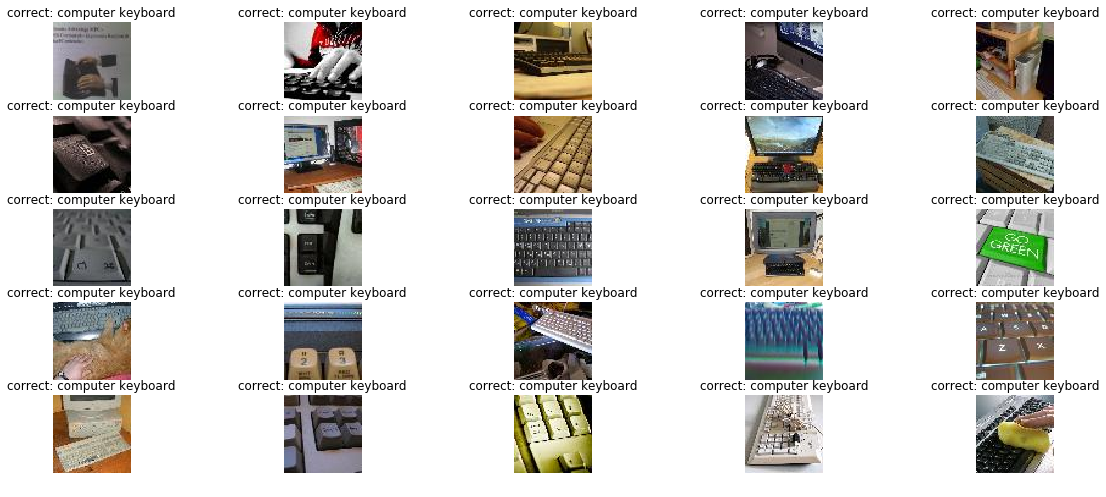

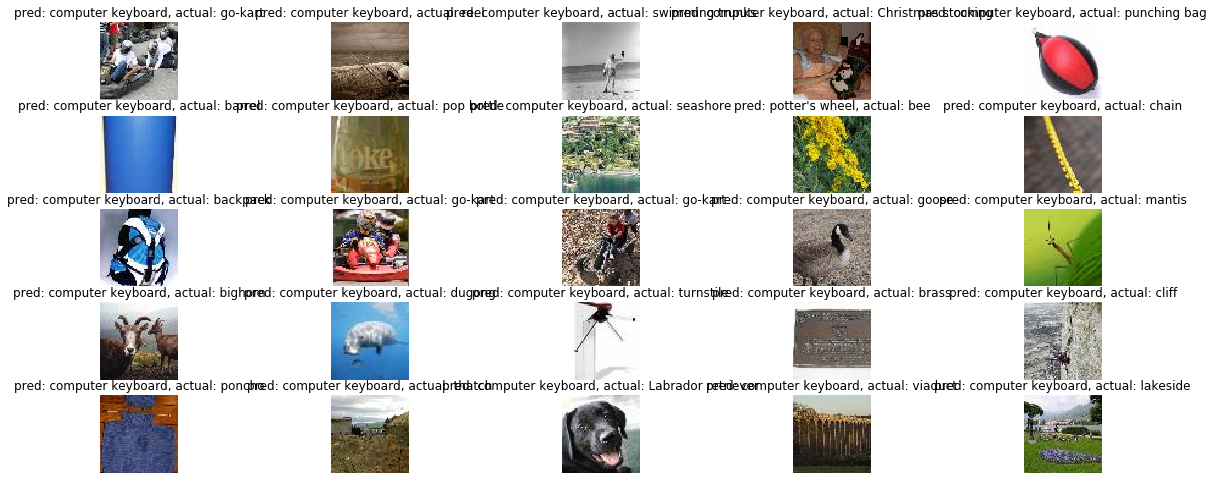

Wed Oct 31 19:16:37 2018 Train Epoch: 0 [0/100000 (0%)]	Loss: 5.298883
Wed Oct 31 19:16:38 2018 Train Epoch: 0 [25600/100000 (26%)]	Loss: 5.297438
Wed Oct 31 19:16:39 2018 Train Epoch: 0 [51200/100000 (51%)]	Loss: 5.296710
Wed Oct 31 19:16:40 2018 Train Epoch: 0 [76800/100000 (77%)]	Loss: 5.300469

Test set: Average loss: 5.2974, Accuracy: 77/10000 (1%)

Saved ./tiny_imagenet/best.pt

Wed Oct 31 19:16:44 2018 Train Epoch: 1 [0/100000 (0%)]	Loss: 5.298375
Wed Oct 31 19:16:45 2018 Train Epoch: 1 [25600/100000 (26%)]	Loss: 5.297149
Wed Oct 31 19:16:46 2018 Train Epoch: 1 [51200/100000 (51%)]	Loss: 5.294691
Wed Oct 31 19:16:47 2018 Train Epoch: 1 [76800/100000 (77%)]	Loss: 5.289056

Test set: Average loss: 5.2053, Accuracy: 94/10000 (1%)

Saved ./tiny_imagenet/best.pt

Wed Oct 31 19:16:50 2018 Train Epoch: 2 [0/100000 (0%)]	Loss: 5.243577
Wed Oct 31 19:16:51 2018 Train Epoch: 2 [25600/100000 (26%)]	Loss: 5.114363
Wed Oct 31 19:16:52 2018 Train Epoch: 2 [51200/100000 (51%)]	Loss: 5.105968
W

Wed Oct 31 19:19:02 2018 Train Epoch: 21 [25600/100000 (26%)]	Loss: 2.887232
Wed Oct 31 19:19:03 2018 Train Epoch: 21 [51200/100000 (51%)]	Loss: 2.820024
Wed Oct 31 19:19:05 2018 Train Epoch: 21 [76800/100000 (77%)]	Loss: 2.728616

Test set: Average loss: 3.2445, Accuracy: 2839/10000 (28%)

Saved ./tiny_imagenet/best.pt

Wed Oct 31 19:19:08 2018 Train Epoch: 22 [0/100000 (0%)]	Loss: 2.617033
Wed Oct 31 19:19:09 2018 Train Epoch: 22 [25600/100000 (26%)]	Loss: 2.945558
Wed Oct 31 19:19:10 2018 Train Epoch: 22 [51200/100000 (51%)]	Loss: 2.961986
Wed Oct 31 19:19:11 2018 Train Epoch: 22 [76800/100000 (77%)]	Loss: 2.817541

Test set: Average loss: 3.2374, Accuracy: 2845/10000 (28%)

Saved ./tiny_imagenet/best.pt

Wed Oct 31 19:19:15 2018 Train Epoch: 23 [0/100000 (0%)]	Loss: 2.852216
Wed Oct 31 19:19:16 2018 Train Epoch: 23 [25600/100000 (26%)]	Loss: 2.914836
Wed Oct 31 19:19:17 2018 Train Epoch: 23 [51200/100000 (51%)]	Loss: 2.886855
Wed Oct 31 19:19:18 2018 Train Epoch: 23 [76800/100000 (

Wed Oct 31 19:21:37 2018 Train Epoch: 43 [51200/100000 (51%)]	Loss: 2.663795
Wed Oct 31 19:21:38 2018 Train Epoch: 43 [76800/100000 (77%)]	Loss: 2.570603

Test set: Average loss: 3.2646, Accuracy: 2929/10000 (29%)

Wed Oct 31 19:21:41 2018 Train Epoch: 44 [0/100000 (0%)]	Loss: 2.731354
Wed Oct 31 19:21:42 2018 Train Epoch: 44 [25600/100000 (26%)]	Loss: 2.638023
Wed Oct 31 19:21:43 2018 Train Epoch: 44 [51200/100000 (51%)]	Loss: 2.610548
Wed Oct 31 19:21:44 2018 Train Epoch: 44 [76800/100000 (77%)]	Loss: 2.574316

Test set: Average loss: 3.2940, Accuracy: 2862/10000 (29%)

Wed Oct 31 19:21:48 2018 Train Epoch: 45 [0/100000 (0%)]	Loss: 2.522729
Wed Oct 31 19:21:49 2018 Train Epoch: 45 [25600/100000 (26%)]	Loss: 2.498293
Wed Oct 31 19:21:50 2018 Train Epoch: 45 [51200/100000 (51%)]	Loss: 2.465435
Wed Oct 31 19:21:51 2018 Train Epoch: 45 [76800/100000 (77%)]	Loss: 2.786464

Test set: Average loss: 3.2199, Accuracy: 2929/10000 (29%)

Wed Oct 31 19:21:55 2018 Train Epoch: 46 [0/100000 (0%)]	

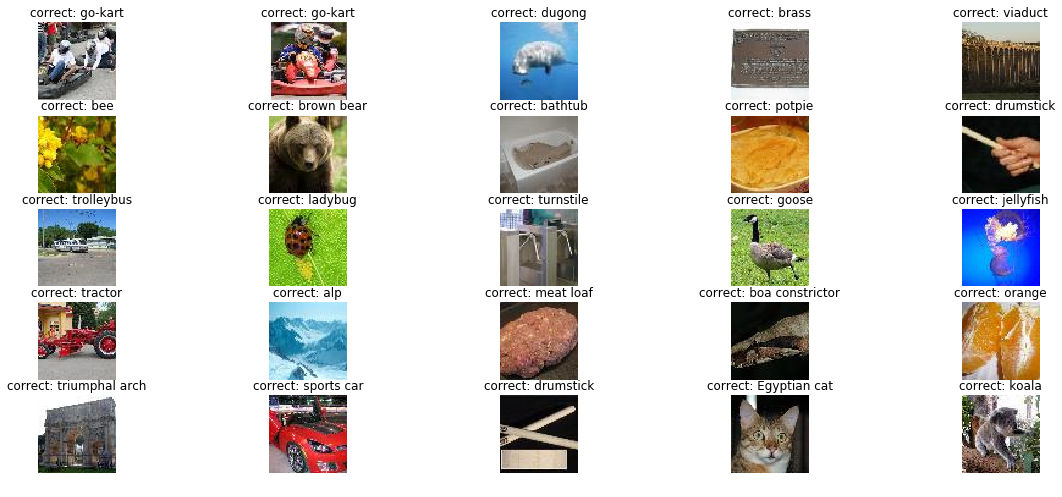

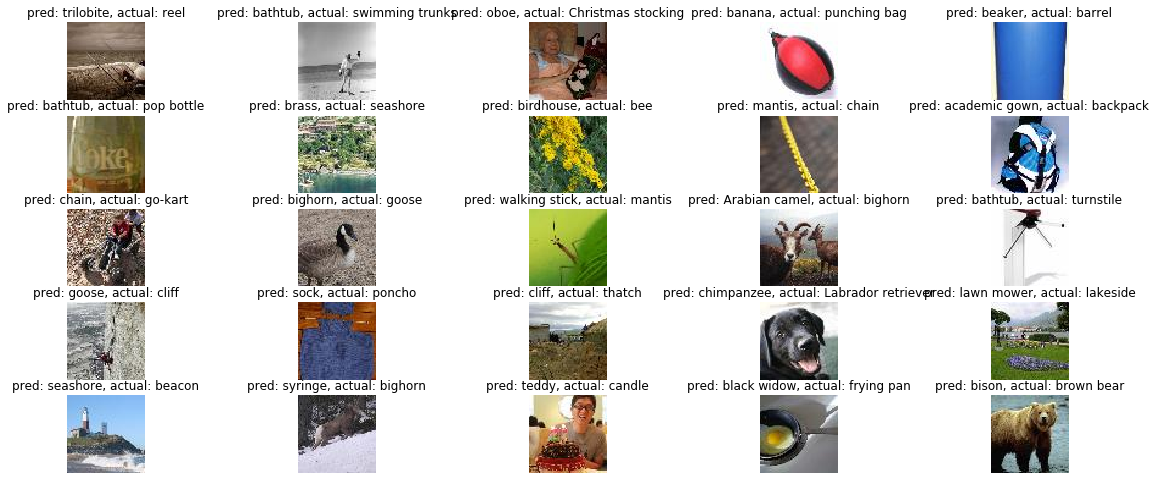

In [57]:
# Play around with these constants, you may find a better setting.
BATCH_SIZE = 256
TEST_BATCH_SIZE = 10
EPOCHS = 50
LEARNING_RATE = 0.01
MOMENTUM = 0.9
USE_CUDA = True
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.0005
LOG_PATH = DATA_PATH + 'log.pkl'
BEST_MODEL_PATH = DATA_PATH + 'best.pt'

# Now the actual training code
use_cuda = USE_CUDA and torch.cuda.is_available()

device = torch.device("cuda" if use_cuda else "cpu")
print('Using device', device)
import multiprocessing
print('num cpus:', multiprocessing.cpu_count())

kwargs = {'num_workers': multiprocessing.cpu_count(),
          'pin_memory': True} if use_cuda else {}

class_names = [line.strip().split(', ') for line in open(DATA_PATH + 'class_names.txt')]
name_to_class = {line[1]: line[0] for line in class_names}
class_names = [line[1] for line in class_names]

train_loader = torch.utils.data.DataLoader(data_train, batch_size=BATCH_SIZE,
                                           shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=TEST_BATCH_SIZE,
                                          shuffle=False, **kwargs)

model = TinyImagenetNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
start_epoch = model.load_last_model(DATA_PATH + 'checkpoints')

# You may want to define another default for your log data depending on how you save it.
log_data = pt_util.read_log(LOG_PATH, [])

correct_images, correct_val, error_images, predicted_val, gt_val, _, _ = test(model, device, test_loader, True)
correct_images = pt_util.to_scaled_uint8(correct_images.transpose(0, 2, 3, 1))
error_images = pt_util.to_scaled_uint8(error_images.transpose(0, 2, 3, 1))
pt_util.show_images(correct_images, ['correct: %s' % class_names[aa] for aa in correct_val])
pt_util.show_images(error_images, ['pred: %s, actual: %s' % (class_names[aa], class_names[bb]) for aa, bb in zip(predicted_val, gt_val)])

train_losses = []
test_losses = []
test_accs = []
try:
    for epoch in range(start_epoch, EPOCHS + 1):
        curr_train_loss = train(model, device, train_loader, optimizer, epoch, PRINT_INTERVAL)
        correct_images, correct_val, error_images, predicted_val, gt_val, curr_test_loss, curr_test_acc = test(model, device, test_loader, True)
        # TODO define other things to do at the end of each loop like logging and saving the best model.
        train_losses.append(curr_train_loss)
        test_losses.append(curr_test_loss)
        test_accs.append(curr_test_acc)
        model.save_best_model(curr_test_acc, BEST_MODEL_PATH)


except KeyboardInterrupt as ke:
    print('Interrupted')
except:
    import traceback
    traceback.print_exc()
finally:
    # Always save the most recent model, but don't delete any existing ones.
    model.save_model(DATA_PATH + 'checkpoints/%03d.pt' % epoch, 0)
    
    # Show some current correct/incorrect images.
    correct_images = pt_util.to_scaled_uint8(correct_images.transpose(0, 2, 3, 1))
    error_images = pt_util.to_scaled_uint8(error_images.transpose(0, 2, 3, 1))
    pt_util.show_images(correct_images, ['correct: %s' % class_names[aa] for aa in correct_val])
    pt_util.show_images(error_images, ['pred: %s, actual: %s' % (class_names[aa], class_names[bb]) for aa, bb in zip(predicted_val, gt_val)])

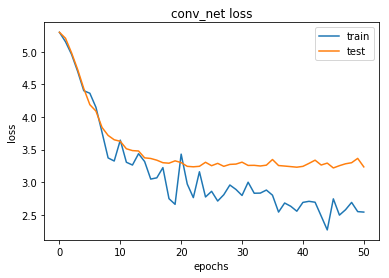

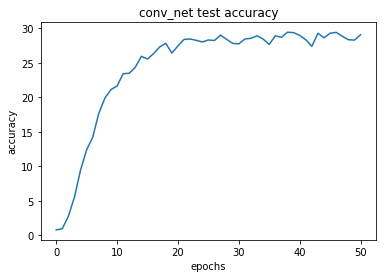

In [59]:
import matplotlib.pyplot as plt

plt.title('conv_net loss')
plt.plot(range(0, 51), train_losses[:51], label='train')
plt.plot(range(0, 51), test_losses[:51], label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
plt.savefig(DATA_PATH + 'bad-loss.png')

plt.clf()
plt.title('conv_net test accuracy')
plt.plot(range(0, 51), test_accs[:51])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
plt.savefig(DATA_PATH + 'bad-acc.png')

# Part 6: ImageNet!
ImageNet is the big granddaddy of supervised vision datasets. It's the dataset that got the whole deep learning train running. We thought it would be fun for you guys to try your hand at it.

A few notes:
- Downloading ImageNet should take about 7 minutues. Extracting should take another 7 minutes. So run this code, then go have a coffee or whatever.
- The data will be removed after 24 hours or so. That's just how Colab works. Each time you reset the environment, you will also have to redownload ImageNet. 
    - I would recommend against storing it on your on Google Drive though as that is way slower to read during training.
    - Through extensive testing, we have found that the fastest way to get the data is the code we provide (faster than saving to google drive, uploading by hand, etc.) 
- Reading images directly with PIL seems to have issues on Colab. Instead try cv2.imread.
    - cv2.imread returns images in bgr order. To go from bgr -> rgb, use    `im = im[:, :, ::-1]`
- The images are provided such that the minimum side length is at least 128 unless the original image was too small for it to be shrunk.
    - transforms.Resize will be your friend
- It seams you cannot use a batch size > 64 x 128 x 128 x 3 while still using multiprocessing due to Colab limitations. You can use larger batches if you set num_workers = 0, but it will be much slower.
- This dataset has 1000 classes, whereas Tiny ImageNet only had 200.
- You will probably want to save your results more than once every epoch since Colab may spurriously shut down your session.
- We know this takes a long time to run. Try leaving it overnight. We don't expect you to get state-of-the-art performance.
- `glob.glob` is a good Python function for reading lots of folder/file names, but it does not return a sorted list.




In [61]:
# Downloads and extracts the data
if not os.path.exists('imagenet128'):
    !echo $(date +%x_%r)
    !gsutil cp gs://imagenet-cropped/imagenet128.tar .
    !echo $(date +%x_%r)
    !tar -xf imagenet128.tar
    !echo $(date +%x_%r)
    !ls imagenet128/train | head -4

10/31/2018_07:37:28 PM
Copying gs://imagenet-cropped/imagenet128.tar...
- [1 files][ 23.7 GiB/ 23.7 GiB]    1.1 MiB/s                                   
Operation completed over 1 objects/23.7 GiB.                                     
10/31/2018_09:18:50 PM
10/31/2018_09:20:35 PM
n01440764
n01443537
n01484850
n01491361


In [106]:
# Sets up synset data. Have a look at what is in these dictionaries as they may help you with debugging.
import json
imagenet_synset_data = json.load(open('imagenet128/imagenet_synsets.json'))
synset_id_to_cls = {val['id']: int(key) for key, val in imagenet_synset_data.items()}

In [107]:
### Data loader
import glob
from PIL import Image
class ImageFolderLoader(torch.utils.data.Dataset):
    def __init__(self, folder, transform=None):
        self.transform = transform
        self.filenames = glob.glob(folder + '/**/*.JPEG')

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, idx):
        filename = self.filenames[idx]
        data = Image.open(filename).convert('RGB')
        data.load()

        label = torch.tensor([synset_id_to_cls[filename.split('/')[2]]], dtype=torch.long)
        
        if self.transform:
            data = self.transform(data)
            
        return (data, label)


In [108]:
train_transforms = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.ToTensor()
])

data_train = ImageFolderLoader('imagenet128/train', transform=train_transforms)
assert(len(data_train) == 1281167)
data_test = ImageFolderLoader('imagenet128/val', transform=test_transforms)
assert(len(data_test) == 50000)

In [109]:
class FullImagenetNet(TinyImagenetNet):
    def __init__(self):
        super(FullImagenetNet, self).__init__()

        # darknet
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv1_bn = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv2_bn = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3_bn = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 64, kernel_size=1)
        self.conv4_bn = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv5_bn = nn.BatchNorm2d(128)
        
        self.conv6 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv6_bn = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 128, kernel_size=1)
        self.conv7_bn = nn.BatchNorm2d(128)
        self.conv8 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv8_bn = nn.BatchNorm2d(256)
        
        self.conv9 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv9_bn = nn.BatchNorm2d(512)
        self.conv10 = nn.Conv2d(512, 256, kernel_size=1)
        self.conv10_bn = nn.BatchNorm2d(256)
        self.conv11 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv11_bn = nn.BatchNorm2d(512)
        self.conv12 = nn.Conv2d(512, 256, kernel_size=1)
        self.conv12_bn = nn.BatchNorm2d(256)
        self.conv13 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv13_bn = nn.BatchNorm2d(512)
        
        self.conv14 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.conv14_bn = nn.BatchNorm2d(1024)
        self.conv15 = nn.Conv2d(1024, 512, kernel_size=1)
        self.conv15_bn = nn.BatchNorm2d(512)
        self.conv16 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.conv16_bn = nn.BatchNorm2d(1024)
        self.conv17 = nn.Conv2d(1024, 512, kernel_size=1)
        self.conv17_bn = nn.BatchNorm2d(512)
        self.conv18 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
        self.conv18_bn = nn.BatchNorm2d(1024)
        self.conv19 = nn.Conv2d(1024, 1000, kernel_size=1, padding=1)
        self.conv19_bn = nn.BatchNorm2d(1000)


    def forward(self, x):
        # darknet
        x = F.leaky_relu(F.max_pool2d(self.conv1_bn(self.conv1(x)), 2, stride=2, padding=1))
        x = F.leaky_relu(F.max_pool2d(self.conv2_bn(self.conv2(x)), 2, stride=2, padding=1))
      
        x = F.leaky_relu(self.conv3_bn(self.conv3(x)))
        x = F.leaky_relu(self.conv4_bn(self.conv4(x)))
        x = F.leaky_relu(F.max_pool2d(self.conv5_bn(self.conv5(x)), 2, stride=2, padding=1))
        
        x = F.leaky_relu(self.conv6_bn(self.conv6(x)))
        x = F.leaky_relu(self.conv7_bn(self.conv7(x)))
        x = F.leaky_relu(F.max_pool2d(self.conv8_bn(self.conv8(x)), 2, stride=2, padding=1))
        
        x = F.leaky_relu(self.conv9_bn(self.conv9(x)))
        x = F.leaky_relu(self.conv10_bn(self.conv10(x)))
        x = F.leaky_relu(self.conv11_bn(self.conv11(x)))
        x = F.leaky_relu(self.conv12_bn(self.conv12(x)))
        x = F.leaky_relu(F.max_pool2d(self.conv13_bn(self.conv13(x)), 2, stride=2, padding=1))
        
        x = F.leaky_relu(self.conv14_bn(self.conv14(x)))
        x = F.leaky_relu(self.conv15_bn(self.conv15(x)))
        x = F.leaky_relu(self.conv16_bn(self.conv16(x)))
        x = F.leaky_relu(self.conv17_bn(self.conv17(x)))
        x = F.leaky_relu(self.conv18_bn(self.conv18(x)))
        x = F.leaky_relu(self.conv19_bn(self.conv19(x)))
        
        x = F.avg_pool2d(x, 7)
        x = x.view(-1, 1000)
        x = F.log_softmax(x, dim=1)

        return x


In [117]:
BATCH_SIZE = 64
TEST_BATCH_SIZE = 50
EPOCHS = 50
LEARNING_RATE = 0.01
MOMENTUM = 0.9
USE_CUDA = True
PRINT_INTERVAL = 100
WEIGHT_DECAY = 0.0005
CHECKPOINT_PATH = BASE_PATH + 'imagenet_full/checkpoints'
LOG_PATH = BASE_PATH + 'imagenet_full/' + 'log.pkl'

use_cuda = USE_CUDA and torch.cuda.is_available()

device = torch.device("cuda" if use_cuda else "cpu")
print('Using device', device)
import multiprocessing
print('num cpus:', multiprocessing.cpu_count())

kwargs = {'num_workers': multiprocessing.cpu_count(),
          'pin_memory': True} if use_cuda else {}


class_names = sorted([(int(key), val['label'].split(',')[0]) for key, val in imagenet_synset_data.items()])
name_to_class = {line[1]: line[0] for line in class_names}
class_names = [line[1] for line in class_names]

train_loader = torch.utils.data.DataLoader(data_train, batch_size=BATCH_SIZE,
                                           shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(data_test, batch_size=TEST_BATCH_SIZE,
                                          shuffle=False, **kwargs)

model = FullImagenetNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=WEIGHT_DECAY)
start_epoch = model.load_last_model(CHECKPOINT_PATH)

train_losses = []
test_losses = []
test_accs = []
try:
    for epoch in range(start_epoch, EPOCHS + 1):
        curr_train_loss = train(model, device, train_loader, optimizer, epoch, PRINT_INTERVAL)
        curr_test_loss, curr_test_acc = test(model, device, test_loader, False)
        model.save_best_model(curr_test_acc, CHECKPOINT_PATH + '/%03d.pt' % epoch)
        train_losses.append(curr_train_loss)
        test_losses.append(curr_test_loss)
        test_accs.append(curr_test_acc)


except KeyboardInterrupt as ke:
    print('Interrupted')
except:
    import traceback
    traceback.print_exc()
finally:
    model.save_model(CHECKPOINT_PATH + '/%03d.pt' % epoch, 0)

('Using device', device(type='cuda'))
('num cpus:', 6)
Thu Nov  1 20:13:19 2018 Train Epoch: 0 [0/1281167 (0%)]	Loss: 6.924747
Thu Nov  1 20:13:28 2018 Train Epoch: 0 [6400/1281167 (0%)]	Loss: 6.881613
Thu Nov  1 20:13:37 2018 Train Epoch: 0 [12800/1281167 (1%)]	Loss: 6.906718
Thu Nov  1 20:13:46 2018 Train Epoch: 0 [19200/1281167 (1%)]	Loss: 6.862535
Thu Nov  1 20:13:55 2018 Train Epoch: 0 [25600/1281167 (2%)]	Loss: 6.782981
Thu Nov  1 20:14:04 2018 Train Epoch: 0 [32000/1281167 (2%)]	Loss: 6.755070
Thu Nov  1 20:14:13 2018 Train Epoch: 0 [38400/1281167 (3%)]	Loss: 6.815856
Thu Nov  1 20:14:23 2018 Train Epoch: 0 [44800/1281167 (3%)]	Loss: 6.756961
Thu Nov  1 20:14:32 2018 Train Epoch: 0 [51200/1281167 (4%)]	Loss: 6.783366
Thu Nov  1 20:14:41 2018 Train Epoch: 0 [57600/1281167 (4%)]	Loss: 6.759247


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5242880 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 20:14:51 2018 Train Epoch: 0 [64000/1281167 (5%)]	Loss: 6.656816
Thu Nov  1 20:15:00 2018 Train Epoch: 0 [70400/1281167 (5%)]	Loss: 6.705675
Thu Nov  1 20:15:10 2018 Train Epoch: 0 [76800/1281167 (6%)]	Loss: 6.537728
Thu Nov  1 20:15:19 2018 Train Epoch: 0 [83200/1281167 (6%)]	Loss: 6.697466
Thu Nov  1 20:15:28 2018 Train Epoch: 0 [89600/1281167 (7%)]	Loss: 6.595330
Thu Nov  1 20:15:37 2018 Train Epoch: 0 [96000/1281167 (7%)]	Loss: 6.642526
Thu Nov  1 20:15:47 2018 Train Epoch: 0 [102400/1281167 (8%)]	Loss: 6.628080
Thu Nov  1 20:15:56 2018 Train Epoch: 0 [108800/1281167 (8%)]	Loss: 6.686108
Thu Nov  1 20:16:05 2018 Train Epoch: 0 [115200/1281167 (9%)]	Loss: 6.573698
Thu Nov  1 20:16:15 2018 Train Epoch: 0 [121600/1281167 (9%)]	Loss: 6.601956
Thu Nov  1 20:16:24 2018 Train Epoch: 0 [128000/1281167 (10%)]	Loss: 6.437594
Thu Nov  1 20:16:33 2018 Train Epoch: 0 [134400/1281167 (10%)]	Loss: 6.576286
Thu Nov  1 20:16:42 2018 Train Epoch: 0 [140800/1281167 (11%)]	Loss: 6.468894
Th

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 947. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 20:18:24 2018 Train Epoch: 0 [211200/1281167 (16%)]	Loss: 6.137659
Thu Nov  1 20:18:34 2018 Train Epoch: 0 [217600/1281167 (17%)]	Loss: 6.105035
Thu Nov  1 20:18:43 2018 Train Epoch: 0 [224000/1281167 (17%)]	Loss: 6.412793
Thu Nov  1 20:18:52 2018 Train Epoch: 0 [230400/1281167 (18%)]	Loss: 6.203961
Thu Nov  1 20:19:02 2018 Train Epoch: 0 [236800/1281167 (18%)]	Loss: 6.194870
Thu Nov  1 20:19:11 2018 Train Epoch: 0 [243200/1281167 (19%)]	Loss: 6.102077
Thu Nov  1 20:19:21 2018 Train Epoch: 0 [249600/1281167 (19%)]	Loss: 6.248900
Thu Nov  1 20:19:31 2018 Train Epoch: 0 [256000/1281167 (20%)]	Loss: 6.295164
Thu Nov  1 20:19:40 2018 Train Epoch: 0 [262400/1281167 (20%)]	Loss: 6.294446


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 20:19:50 2018 Train Epoch: 0 [268800/1281167 (21%)]	Loss: 5.994272
Thu Nov  1 20:19:59 2018 Train Epoch: 0 [275200/1281167 (21%)]	Loss: 6.048911
Thu Nov  1 20:20:08 2018 Train Epoch: 0 [281600/1281167 (22%)]	Loss: 6.130623


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1835008 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 20:20:17 2018 Train Epoch: 0 [288000/1281167 (22%)]	Loss: 6.142384
Thu Nov  1 20:20:27 2018 Train Epoch: 0 [294400/1281167 (23%)]	Loss: 6.013812
Thu Nov  1 20:20:36 2018 Train Epoch: 0 [300800/1281167 (23%)]	Loss: 5.982534
Thu Nov  1 20:20:46 2018 Train Epoch: 0 [307200/1281167 (24%)]	Loss: 6.099500
Thu Nov  1 20:20:56 2018 Train Epoch: 0 [313600/1281167 (24%)]	Loss: 5.787002
Thu Nov  1 20:21:05 2018 Train Epoch: 0 [320000/1281167 (25%)]	Loss: 5.820444
Thu Nov  1 20:21:15 2018 Train Epoch: 0 [326400/1281167 (25%)]	Loss: 5.895831
Thu Nov  1 20:21:25 2018 Train Epoch: 0 [332800/1281167 (26%)]	Loss: 5.867410
Thu Nov  1 20:21:34 2018 Train Epoch: 0 [339200/1281167 (26%)]	Loss: 5.729739
Thu Nov  1 20:21:44 2018 Train Epoch: 0 [345600/1281167 (27%)]	Loss: 5.889893
Thu Nov  1 20:21:54 2018 Train Epoch: 0 [352000/1281167 (27%)]	Loss: 5.880633
Thu Nov  1 20:22:03 2018 Train Epoch: 0 [358400/1281167 (28%)]	Loss: 5.978265
Thu Nov  1 20:22:13 2018 Train Epoch: 0 [364800/1281167 (28%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 20:23:09 2018 Train Epoch: 0 [403200/1281167 (31%)]	Loss: 5.677567
Thu Nov  1 20:23:18 2018 Train Epoch: 0 [409600/1281167 (32%)]	Loss: 5.678817
Thu Nov  1 20:23:27 2018 Train Epoch: 0 [416000/1281167 (32%)]	Loss: 5.863254
Thu Nov  1 20:23:36 2018 Train Epoch: 0 [422400/1281167 (33%)]	Loss: 5.657666
Thu Nov  1 20:23:46 2018 Train Epoch: 0 [428800/1281167 (33%)]	Loss: 5.841594
Thu Nov  1 20:23:56 2018 Train Epoch: 0 [435200/1281167 (34%)]	Loss: 5.714772
Thu Nov  1 20:24:05 2018 Train Epoch: 0 [441600/1281167 (34%)]	Loss: 5.654576
Thu Nov  1 20:24:15 2018 Train Epoch: 0 [448000/1281167 (35%)]	Loss: 5.537075
Thu Nov  1 20:24:24 2018 Train Epoch: 0 [454400/1281167 (35%)]	Loss: 5.899032
Thu Nov  1 20:24:33 2018 Train Epoch: 0 [460800/1281167 (36%)]	Loss: 5.768946
Thu Nov  1 20:24:43 2018 Train Epoch: 0 [467200/1281167 (36%)]	Loss: 5.630019
Thu Nov  1 20:24:52 2018 Train Epoch: 0 [473600/1281167 (37%)]	Loss: 5.631274
Thu Nov  1 20:25:01 2018 Train Epoch: 0 [480000/1281167 (37%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3276800 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 20:30:04 2018 Train Epoch: 0 [684800/1281167 (53%)]	Loss: 5.092733
Thu Nov  1 20:30:14 2018 Train Epoch: 0 [691200/1281167 (54%)]	Loss: 5.170739
Thu Nov  1 20:30:23 2018 Train Epoch: 0 [697600/1281167 (54%)]	Loss: 5.237617
Thu Nov  1 20:30:33 2018 Train Epoch: 0 [704000/1281167 (55%)]	Loss: 5.277691
Thu Nov  1 20:30:42 2018 Train Epoch: 0 [710400/1281167 (55%)]	Loss: 4.920692
Thu Nov  1 20:30:51 2018 Train Epoch: 0 [716800/1281167 (56%)]	Loss: 5.011265
Thu Nov  1 20:31:01 2018 Train Epoch: 0 [723200/1281167 (56%)]	Loss: 4.947560
Thu Nov  1 20:31:10 2018 Train Epoch: 0 [729600/1281167 (57%)]	Loss: 5.079542
Thu Nov  1 20:31:19 2018 Train Epoch: 0 [736000/1281167 (57%)]	Loss: 5.258564
Thu Nov  1 20:31:29 2018 Train Epoch: 0 [742400/1281167 (58%)]	Loss: 5.248904
Thu Nov  1 20:31:38 2018 Train Epoch: 0 [748800/1281167 (58%)]	Loss: 4.957768
Thu Nov  1 20:31:47 2018 Train Epoch: 0 [755200/1281167 (59%)]	Loss: 5.013743
Thu Nov  1 20:31:57 2018 Train Epoch: 0 [761600/1281167 (59%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37093376 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 39976960 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/ana

Thu Nov  1 20:34:18 2018 Train Epoch: 0 [857600/1281167 (67%)]	Loss: 5.016189
Thu Nov  1 20:34:28 2018 Train Epoch: 0 [864000/1281167 (67%)]	Loss: 4.787975
Thu Nov  1 20:34:37 2018 Train Epoch: 0 [870400/1281167 (68%)]	Loss: 5.155780
Thu Nov  1 20:34:47 2018 Train Epoch: 0 [876800/1281167 (68%)]	Loss: 4.737169
Thu Nov  1 20:34:56 2018 Train Epoch: 0 [883200/1281167 (69%)]	Loss: 4.988902
Thu Nov  1 20:35:05 2018 Train Epoch: 0 [889600/1281167 (69%)]	Loss: 4.626431
Thu Nov  1 20:35:14 2018 Train Epoch: 0 [896000/1281167 (70%)]	Loss: 5.162047
Thu Nov  1 20:35:23 2018 Train Epoch: 0 [902400/1281167 (70%)]	Loss: 4.575914
Thu Nov  1 20:35:33 2018 Train Epoch: 0 [908800/1281167 (71%)]	Loss: 4.984356
Thu Nov  1 20:35:43 2018 Train Epoch: 0 [915200/1281167 (71%)]	Loss: 4.834021
Thu Nov  1 20:35:53 2018 Train Epoch: 0 [921600/1281167 (72%)]	Loss: 4.914599
Thu Nov  1 20:36:02 2018 Train Epoch: 0 [928000/1281167 (72%)]	Loss: 4.840863
Thu Nov  1 20:36:12 2018 Train Epoch: 0 [934400/1281167 (73%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 20:38:05 2018 Train Epoch: 0 [1011200/1281167 (79%)]	Loss: 4.737168
Thu Nov  1 20:38:15 2018 Train Epoch: 0 [1017600/1281167 (79%)]	Loss: 4.805151
Thu Nov  1 20:38:24 2018 Train Epoch: 0 [1024000/1281167 (80%)]	Loss: 4.484580


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 20:38:34 2018 Train Epoch: 0 [1030400/1281167 (80%)]	Loss: 5.048896
Thu Nov  1 20:38:43 2018 Train Epoch: 0 [1036800/1281167 (81%)]	Loss: 5.197917
Thu Nov  1 20:38:52 2018 Train Epoch: 0 [1043200/1281167 (81%)]	Loss: 4.660257
Thu Nov  1 20:39:02 2018 Train Epoch: 0 [1049600/1281167 (82%)]	Loss: 5.234647
Thu Nov  1 20:39:11 2018 Train Epoch: 0 [1056000/1281167 (82%)]	Loss: 4.677274
Thu Nov  1 20:39:20 2018 Train Epoch: 0 [1062400/1281167 (83%)]	Loss: 4.619264


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 20:39:29 2018 Train Epoch: 0 [1068800/1281167 (83%)]	Loss: 4.670422
Thu Nov  1 20:39:39 2018 Train Epoch: 0 [1075200/1281167 (84%)]	Loss: 4.747799
Thu Nov  1 20:39:48 2018 Train Epoch: 0 [1081600/1281167 (84%)]	Loss: 4.609601
Thu Nov  1 20:39:58 2018 Train Epoch: 0 [1088000/1281167 (85%)]	Loss: 4.608983
Thu Nov  1 20:40:07 2018 Train Epoch: 0 [1094400/1281167 (85%)]	Loss: 5.038025
Thu Nov  1 20:40:16 2018 Train Epoch: 0 [1100800/1281167 (86%)]	Loss: 4.692515
Thu Nov  1 20:40:25 2018 Train Epoch: 0 [1107200/1281167 (86%)]	Loss: 4.426165
Thu Nov  1 20:40:35 2018 Train Epoch: 0 [1113600/1281167 (87%)]	Loss: 4.760360
Thu Nov  1 20:40:45 2018 Train Epoch: 0 [1120000/1281167 (87%)]	Loss: 4.968409
Thu Nov  1 20:40:54 2018 Train Epoch: 0 [1126400/1281167 (88%)]	Loss: 4.609898
Thu Nov  1 20:41:04 2018 Train Epoch: 0 [1132800/1281167 (88%)]	Loss: 4.777861
Thu Nov  1 20:41:13 2018 Train Epoch: 0 [1139200/1281167 (89%)]	Loss: 4.604138
Thu Nov  1 20:41:22 2018 Train Epoch: 0 [1145600/128

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 20:44:08 2018 Train Epoch: 0 [1260800/1281167 (98%)]	Loss: 4.988332
Thu Nov  1 20:44:17 2018 Train Epoch: 0 [1267200/1281167 (99%)]	Loss: 4.193298
Thu Nov  1 20:44:26 2018 Train Epoch: 0 [1273600/1281167 (99%)]	Loss: 4.532108
Thu Nov  1 20:44:35 2018 Train Epoch: 0 [1280000/1281167 (100%)]	Loss: 4.234778

Test set: Average loss: 4.7274, Accuracy: 6981/50000 (14%)

Saved ./imagenet_full/checkpoints/000.pt

Thu Nov  1 20:45:02 2018 Train Epoch: 1 [0/1281167 (0%)]	Loss: 4.578830


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3276800 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 20:45:10 2018 Train Epoch: 1 [6400/1281167 (0%)]	Loss: 4.450104
Thu Nov  1 20:45:19 2018 Train Epoch: 1 [12800/1281167 (1%)]	Loss: 4.601385
Thu Nov  1 20:45:28 2018 Train Epoch: 1 [19200/1281167 (1%)]	Loss: 4.015036
Thu Nov  1 20:45:37 2018 Train Epoch: 1 [25600/1281167 (2%)]	Loss: 4.450230
Thu Nov  1 20:45:46 2018 Train Epoch: 1 [32000/1281167 (2%)]	Loss: 4.235941
Thu Nov  1 20:45:55 2018 Train Epoch: 1 [38400/1281167 (3%)]	Loss: 4.373899
Thu Nov  1 20:46:04 2018 Train Epoch: 1 [44800/1281167 (3%)]	Loss: 4.315423


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 20:46:13 2018 Train Epoch: 1 [51200/1281167 (4%)]	Loss: 4.765636
Thu Nov  1 20:46:22 2018 Train Epoch: 1 [57600/1281167 (4%)]	Loss: 4.409754
Thu Nov  1 20:46:30 2018 Train Epoch: 1 [64000/1281167 (5%)]	Loss: 4.472427
Thu Nov  1 20:46:39 2018 Train Epoch: 1 [70400/1281167 (5%)]	Loss: 4.258280
Thu Nov  1 20:46:48 2018 Train Epoch: 1 [76800/1281167 (6%)]	Loss: 4.802133
Thu Nov  1 20:46:57 2018 Train Epoch: 1 [83200/1281167 (6%)]	Loss: 4.255628
Thu Nov  1 20:47:06 2018 Train Epoch: 1 [89600/1281167 (7%)]	Loss: 4.301280
Thu Nov  1 20:47:15 2018 Train Epoch: 1 [96000/1281167 (7%)]	Loss: 4.410784
Thu Nov  1 20:47:24 2018 Train Epoch: 1 [102400/1281167 (8%)]	Loss: 4.538875
Thu Nov  1 20:47:33 2018 Train Epoch: 1 [108800/1281167 (8%)]	Loss: 4.714053
Thu Nov  1 20:47:41 2018 Train Epoch: 1 [115200/1281167 (9%)]	Loss: 4.570745
Thu Nov  1 20:47:51 2018 Train Epoch: 1 [121600/1281167 (9%)]	Loss: 4.504767
Thu Nov  1 20:48:00 2018 Train Epoch: 1 [128000/1281167 (10%)]	Loss: 4.277016
Thu No

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 947. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 20:48:27 2018 Train Epoch: 1 [147200/1281167 (11%)]	Loss: 3.970365
Thu Nov  1 20:48:37 2018 Train Epoch: 1 [153600/1281167 (12%)]	Loss: 4.683518
Thu Nov  1 20:48:46 2018 Train Epoch: 1 [160000/1281167 (12%)]	Loss: 4.665436
Thu Nov  1 20:48:55 2018 Train Epoch: 1 [166400/1281167 (13%)]	Loss: 4.335873
Thu Nov  1 20:49:04 2018 Train Epoch: 1 [172800/1281167 (13%)]	Loss: 4.477369
Thu Nov  1 20:49:13 2018 Train Epoch: 1 [179200/1281167 (14%)]	Loss: 4.992139
Thu Nov  1 20:49:23 2018 Train Epoch: 1 [185600/1281167 (14%)]	Loss: 4.350206
Thu Nov  1 20:49:32 2018 Train Epoch: 1 [192000/1281167 (15%)]	Loss: 4.425549
Thu Nov  1 20:49:41 2018 Train Epoch: 1 [198400/1281167 (15%)]	Loss: 3.981736
Thu Nov  1 20:49:50 2018 Train Epoch: 1 [204800/1281167 (16%)]	Loss: 4.800270
Thu Nov  1 20:49:59 2018 Train Epoch: 1 [211200/1281167 (16%)]	Loss: 4.105753
Thu Nov  1 20:50:09 2018 Train Epoch: 1 [217600/1281167 (17%)]	Loss: 4.624050
Thu Nov  1 20:50:18 2018 Train Epoch: 1 [224000/1281167 (17%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 20:50:37 2018 Train Epoch: 1 [236800/1281167 (18%)]	Loss: 4.125025
Thu Nov  1 20:50:46 2018 Train Epoch: 1 [243200/1281167 (19%)]	Loss: 4.502797
Thu Nov  1 20:50:56 2018 Train Epoch: 1 [249600/1281167 (19%)]	Loss: 4.949239
Thu Nov  1 20:51:05 2018 Train Epoch: 1 [256000/1281167 (20%)]	Loss: 4.382486
Thu Nov  1 20:51:15 2018 Train Epoch: 1 [262400/1281167 (20%)]	Loss: 4.338403
Thu Nov  1 20:51:24 2018 Train Epoch: 1 [268800/1281167 (21%)]	Loss: 4.083669
Thu Nov  1 20:51:34 2018 Train Epoch: 1 [275200/1281167 (21%)]	Loss: 4.821812
Thu Nov  1 20:51:43 2018 Train Epoch: 1 [281600/1281167 (22%)]	Loss: 4.373939
Thu Nov  1 20:51:52 2018 Train Epoch: 1 [288000/1281167 (22%)]	Loss: 4.132577
Thu Nov  1 20:52:02 2018 Train Epoch: 1 [294400/1281167 (23%)]	Loss: 4.451580
Thu Nov  1 20:52:11 2018 Train Epoch: 1 [300800/1281167 (23%)]	Loss: 4.150924
Thu Nov  1 20:52:20 2018 Train Epoch: 1 [307200/1281167 (24%)]	Loss: 4.290553
Thu Nov  1 20:52:29 2018 Train Epoch: 1 [313600/1281167 (24%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 20:53:34 2018 Train Epoch: 1 [358400/1281167 (28%)]	Loss: 4.137256
Thu Nov  1 20:53:44 2018 Train Epoch: 1 [364800/1281167 (28%)]	Loss: 4.281195
Thu Nov  1 20:53:53 2018 Train Epoch: 1 [371200/1281167 (29%)]	Loss: 4.372432
Thu Nov  1 20:54:02 2018 Train Epoch: 1 [377600/1281167 (29%)]	Loss: 4.376652
Thu Nov  1 20:54:12 2018 Train Epoch: 1 [384000/1281167 (30%)]	Loss: 4.121491
Thu Nov  1 20:54:21 2018 Train Epoch: 1 [390400/1281167 (30%)]	Loss: 4.569631
Thu Nov  1 20:54:30 2018 Train Epoch: 1 [396800/1281167 (31%)]	Loss: 4.449009
Thu Nov  1 20:54:39 2018 Train Epoch: 1 [403200/1281167 (31%)]	Loss: 4.410163
Thu Nov  1 20:54:49 2018 Train Epoch: 1 [409600/1281167 (32%)]	Loss: 4.319314
Thu Nov  1 20:54:58 2018 Train Epoch: 1 [416000/1281167 (32%)]	Loss: 4.314703
Thu Nov  1 20:55:07 2018 Train Epoch: 1 [422400/1281167 (33%)]	Loss: 4.021036
Thu Nov  1 20:55:17 2018 Train Epoch: 1 [428800/1281167 (33%)]	Loss: 4.278176
Thu Nov  1 20:55:26 2018 Train Epoch: 1 [435200/1281167 (34%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37093376 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 39976960 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/ana

Thu Nov  1 20:58:24 2018 Train Epoch: 1 [556800/1281167 (43%)]	Loss: 4.449680
Thu Nov  1 20:58:34 2018 Train Epoch: 1 [563200/1281167 (44%)]	Loss: 4.572223
Thu Nov  1 20:58:43 2018 Train Epoch: 1 [569600/1281167 (44%)]	Loss: 4.156741
Thu Nov  1 20:58:52 2018 Train Epoch: 1 [576000/1281167 (45%)]	Loss: 4.080129
Thu Nov  1 20:59:02 2018 Train Epoch: 1 [582400/1281167 (45%)]	Loss: 3.893074
Thu Nov  1 20:59:11 2018 Train Epoch: 1 [588800/1281167 (46%)]	Loss: 4.426772
Thu Nov  1 20:59:21 2018 Train Epoch: 1 [595200/1281167 (46%)]	Loss: 4.116265
Thu Nov  1 20:59:30 2018 Train Epoch: 1 [601600/1281167 (47%)]	Loss: 4.183483
Thu Nov  1 20:59:39 2018 Train Epoch: 1 [608000/1281167 (47%)]	Loss: 4.450931
Thu Nov  1 20:59:49 2018 Train Epoch: 1 [614400/1281167 (48%)]	Loss: 4.332400
Thu Nov  1 20:59:58 2018 Train Epoch: 1 [620800/1281167 (48%)]	Loss: 4.192767
Thu Nov  1 21:00:08 2018 Train Epoch: 1 [627200/1281167 (49%)]	Loss: 4.326218
Thu Nov  1 21:00:17 2018 Train Epoch: 1 [633600/1281167 (49%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5242880 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 21:03:25 2018 Train Epoch: 1 [761600/1281167 (59%)]	Loss: 3.793679
Thu Nov  1 21:03:34 2018 Train Epoch: 1 [768000/1281167 (60%)]	Loss: 3.828525
Thu Nov  1 21:03:43 2018 Train Epoch: 1 [774400/1281167 (60%)]	Loss: 4.474423
Thu Nov  1 21:03:53 2018 Train Epoch: 1 [780800/1281167 (61%)]	Loss: 4.227743
Thu Nov  1 21:04:02 2018 Train Epoch: 1 [787200/1281167 (61%)]	Loss: 4.013403
Thu Nov  1 21:04:11 2018 Train Epoch: 1 [793600/1281167 (62%)]	Loss: 4.020650
Thu Nov  1 21:04:21 2018 Train Epoch: 1 [800000/1281167 (62%)]	Loss: 3.941441
Thu Nov  1 21:04:30 2018 Train Epoch: 1 [806400/1281167 (63%)]	Loss: 4.239969
Thu Nov  1 21:04:39 2018 Train Epoch: 1 [812800/1281167 (63%)]	Loss: 4.043324
Thu Nov  1 21:04:49 2018 Train Epoch: 1 [819200/1281167 (64%)]	Loss: 4.190687
Thu Nov  1 21:04:58 2018 Train Epoch: 1 [825600/1281167 (64%)]	Loss: 4.253410
Thu Nov  1 21:05:07 2018 Train Epoch: 1 [832000/1281167 (65%)]	Loss: 4.241844
Thu Nov  1 21:05:16 2018 Train Epoch: 1 [838400/1281167 (65%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


Thu Nov  1 21:05:26 2018 Train Epoch: 1 [844800/1281167 (66%)]	Loss: 3.916631
Thu Nov  1 21:05:35 2018 Train Epoch: 1 [851200/1281167 (66%)]	Loss: 4.012743
Thu Nov  1 21:05:44 2018 Train Epoch: 1 [857600/1281167 (67%)]	Loss: 4.221092
Thu Nov  1 21:05:54 2018 Train Epoch: 1 [864000/1281167 (67%)]	Loss: 4.045013


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1835008 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:06:03 2018 Train Epoch: 1 [870400/1281167 (68%)]	Loss: 3.898264
Thu Nov  1 21:06:12 2018 Train Epoch: 1 [876800/1281167 (68%)]	Loss: 4.342236
Thu Nov  1 21:06:22 2018 Train Epoch: 1 [883200/1281167 (69%)]	Loss: 4.234010
Thu Nov  1 21:06:31 2018 Train Epoch: 1 [889600/1281167 (69%)]	Loss: 4.417774
Thu Nov  1 21:06:40 2018 Train Epoch: 1 [896000/1281167 (70%)]	Loss: 3.633916
Thu Nov  1 21:06:50 2018 Train Epoch: 1 [902400/1281167 (70%)]	Loss: 4.321332
Thu Nov  1 21:06:59 2018 Train Epoch: 1 [908800/1281167 (71%)]	Loss: 4.178269
Thu Nov  1 21:07:09 2018 Train Epoch: 1 [915200/1281167 (71%)]	Loss: 4.222227


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:07:18 2018 Train Epoch: 1 [921600/1281167 (72%)]	Loss: 3.886506


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 21:07:28 2018 Train Epoch: 1 [928000/1281167 (72%)]	Loss: 3.872380
Thu Nov  1 21:07:38 2018 Train Epoch: 1 [934400/1281167 (73%)]	Loss: 4.332858
Thu Nov  1 21:07:47 2018 Train Epoch: 1 [940800/1281167 (73%)]	Loss: 3.954627
Thu Nov  1 21:07:57 2018 Train Epoch: 1 [947200/1281167 (74%)]	Loss: 4.414567
Thu Nov  1 21:08:07 2018 Train Epoch: 1 [953600/1281167 (74%)]	Loss: 4.409492
Thu Nov  1 21:08:16 2018 Train Epoch: 1 [960000/1281167 (75%)]	Loss: 4.111356
Thu Nov  1 21:08:26 2018 Train Epoch: 1 [966400/1281167 (75%)]	Loss: 3.901116
Thu Nov  1 21:08:35 2018 Train Epoch: 1 [972800/1281167 (76%)]	Loss: 3.950352
Thu Nov  1 21:08:44 2018 Train Epoch: 1 [979200/1281167 (76%)]	Loss: 3.873124
Thu Nov  1 21:08:54 2018 Train Epoch: 1 [985600/1281167 (77%)]	Loss: 4.018556
Thu Nov  1 21:09:03 2018 Train Epoch: 1 [992000/1281167 (77%)]	Loss: 4.148816
Thu Nov  1 21:09:13 2018 Train Epoch: 1 [998400/1281167 (78%)]	Loss: 3.969853
Thu Nov  1 21:09:23 2018 Train Epoch: 1 [1004800/1281167 (78%)]	

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:12:20 2018 Train Epoch: 1 [1126400/1281167 (88%)]	Loss: 4.090263
Thu Nov  1 21:12:29 2018 Train Epoch: 1 [1132800/1281167 (88%)]	Loss: 3.982384
Thu Nov  1 21:12:39 2018 Train Epoch: 1 [1139200/1281167 (89%)]	Loss: 3.868716
Thu Nov  1 21:12:48 2018 Train Epoch: 1 [1145600/1281167 (89%)]	Loss: 3.865317
Thu Nov  1 21:12:57 2018 Train Epoch: 1 [1152000/1281167 (90%)]	Loss: 4.206942
Thu Nov  1 21:13:07 2018 Train Epoch: 1 [1158400/1281167 (90%)]	Loss: 3.343805
Thu Nov  1 21:13:16 2018 Train Epoch: 1 [1164800/1281167 (91%)]	Loss: 4.138246
Thu Nov  1 21:13:25 2018 Train Epoch: 1 [1171200/1281167 (91%)]	Loss: 4.282362
Thu Nov  1 21:13:35 2018 Train Epoch: 1 [1177600/1281167 (92%)]	Loss: 3.786320
Thu Nov  1 21:13:44 2018 Train Epoch: 1 [1184000/1281167 (92%)]	Loss: 3.668508
Thu Nov  1 21:13:54 2018 Train Epoch: 1 [1190400/1281167 (93%)]	Loss: 3.611194
Thu Nov  1 21:14:03 2018 Train Epoch: 1 [1196800/1281167 (93%)]	Loss: 3.787768
Thu Nov  1 21:14:12 2018 Train Epoch: 1 [1203200/128

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:15:18 2018 Train Epoch: 1 [1248000/1281167 (97%)]	Loss: 3.435906
Thu Nov  1 21:15:28 2018 Train Epoch: 1 [1254400/1281167 (98%)]	Loss: 3.787131
Thu Nov  1 21:15:37 2018 Train Epoch: 1 [1260800/1281167 (98%)]	Loss: 3.433586
Thu Nov  1 21:15:46 2018 Train Epoch: 1 [1267200/1281167 (99%)]	Loss: 4.290374
Thu Nov  1 21:15:55 2018 Train Epoch: 1 [1273600/1281167 (99%)]	Loss: 4.037735
Thu Nov  1 21:16:05 2018 Train Epoch: 1 [1280000/1281167 (100%)]	Loss: 3.703619

Test set: Average loss: 4.6398, Accuracy: 8610/50000 (17%)

Saved ./imagenet_full/checkpoints/001.pt

Thu Nov  1 21:16:33 2018 Train Epoch: 2 [0/1281167 (0%)]	Loss: 3.936650
Thu Nov  1 21:16:43 2018 Train Epoch: 2 [6400/1281167 (0%)]	Loss: 3.738142
Thu Nov  1 21:16:52 2018 Train Epoch: 2 [12800/1281167 (1%)]	Loss: 3.347479
Thu Nov  1 21:17:02 2018 Train Epoch: 2 [19200/1281167 (1%)]	Loss: 3.455876
Thu Nov  1 21:17:11 2018 Train Epoch: 2 [25600/1281167 (2%)]	Loss: 3.779851
Thu Nov  1 21:17:21 2018 Train Epoch: 2 [32000/

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:18:37 2018 Train Epoch: 2 [83200/1281167 (6%)]	Loss: 3.676716
Thu Nov  1 21:18:46 2018 Train Epoch: 2 [89600/1281167 (7%)]	Loss: 4.284495
Thu Nov  1 21:18:55 2018 Train Epoch: 2 [96000/1281167 (7%)]	Loss: 3.835742
Thu Nov  1 21:19:05 2018 Train Epoch: 2 [102400/1281167 (8%)]	Loss: 4.019795
Thu Nov  1 21:19:14 2018 Train Epoch: 2 [108800/1281167 (8%)]	Loss: 3.727134
Thu Nov  1 21:19:24 2018 Train Epoch: 2 [115200/1281167 (9%)]	Loss: 4.100486
Thu Nov  1 21:19:34 2018 Train Epoch: 2 [121600/1281167 (9%)]	Loss: 3.949501
Thu Nov  1 21:19:43 2018 Train Epoch: 2 [128000/1281167 (10%)]	Loss: 3.660072
Thu Nov  1 21:19:53 2018 Train Epoch: 2 [134400/1281167 (10%)]	Loss: 4.070157
Thu Nov  1 21:20:02 2018 Train Epoch: 2 [140800/1281167 (11%)]	Loss: 4.118089
Thu Nov  1 21:20:12 2018 Train Epoch: 2 [147200/1281167 (11%)]	Loss: 4.102050


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


Thu Nov  1 21:20:21 2018 Train Epoch: 2 [153600/1281167 (12%)]	Loss: 3.670056
Thu Nov  1 21:20:31 2018 Train Epoch: 2 [160000/1281167 (12%)]	Loss: 3.493601
Thu Nov  1 21:20:40 2018 Train Epoch: 2 [166400/1281167 (13%)]	Loss: 3.854381
Thu Nov  1 21:20:50 2018 Train Epoch: 2 [172800/1281167 (13%)]	Loss: 3.626244
Thu Nov  1 21:20:59 2018 Train Epoch: 2 [179200/1281167 (14%)]	Loss: 3.888331
Thu Nov  1 21:21:09 2018 Train Epoch: 2 [185600/1281167 (14%)]	Loss: 3.698331
Thu Nov  1 21:21:18 2018 Train Epoch: 2 [192000/1281167 (15%)]	Loss: 4.114842
Thu Nov  1 21:21:28 2018 Train Epoch: 2 [198400/1281167 (15%)]	Loss: 3.935618
Thu Nov  1 21:21:37 2018 Train Epoch: 2 [204800/1281167 (16%)]	Loss: 3.786163
Thu Nov  1 21:21:47 2018 Train Epoch: 2 [211200/1281167 (16%)]	Loss: 4.112629
Thu Nov  1 21:21:56 2018 Train Epoch: 2 [217600/1281167 (17%)]	Loss: 3.492662
Thu Nov  1 21:22:05 2018 Train Epoch: 2 [224000/1281167 (17%)]	Loss: 4.205307
Thu Nov  1 21:22:14 2018 Train Epoch: 2 [230400/1281167 (18%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1835008 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:27:22 2018 Train Epoch: 2 [441600/1281167 (34%)]	Loss: 3.461744
Thu Nov  1 21:27:31 2018 Train Epoch: 2 [448000/1281167 (35%)]	Loss: 3.607901
Thu Nov  1 21:27:41 2018 Train Epoch: 2 [454400/1281167 (35%)]	Loss: 4.106685
Thu Nov  1 21:27:50 2018 Train Epoch: 2 [460800/1281167 (36%)]	Loss: 3.955477


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5242880 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 21:27:59 2018 Train Epoch: 2 [467200/1281167 (36%)]	Loss: 3.818523
Thu Nov  1 21:28:08 2018 Train Epoch: 2 [473600/1281167 (37%)]	Loss: 3.936985
Thu Nov  1 21:28:18 2018 Train Epoch: 2 [480000/1281167 (37%)]	Loss: 3.428031
Thu Nov  1 21:28:27 2018 Train Epoch: 2 [486400/1281167 (38%)]	Loss: 3.706389
Thu Nov  1 21:28:36 2018 Train Epoch: 2 [492800/1281167 (38%)]	Loss: 4.099057
Thu Nov  1 21:28:46 2018 Train Epoch: 2 [499200/1281167 (39%)]	Loss: 3.554541
Thu Nov  1 21:28:55 2018 Train Epoch: 2 [505600/1281167 (39%)]	Loss: 4.036302
Thu Nov  1 21:29:04 2018 Train Epoch: 2 [512000/1281167 (40%)]	Loss: 4.105031


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37093376 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:29:13 2018 Train Epoch: 2 [518400/1281167 (40%)]	Loss: 3.735000


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 39976960 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 34865152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 10. 
  warnings.warn(str(msg))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/

Thu Nov  1 21:29:22 2018 Train Epoch: 2 [524800/1281167 (41%)]	Loss: 3.437936
Thu Nov  1 21:29:32 2018 Train Epoch: 2 [531200/1281167 (41%)]	Loss: 3.585644
Thu Nov  1 21:29:41 2018 Train Epoch: 2 [537600/1281167 (42%)]	Loss: 3.808804
Thu Nov  1 21:29:50 2018 Train Epoch: 2 [544000/1281167 (42%)]	Loss: 3.810503
Thu Nov  1 21:30:00 2018 Train Epoch: 2 [550400/1281167 (43%)]	Loss: 4.034005
Thu Nov  1 21:30:09 2018 Train Epoch: 2 [556800/1281167 (43%)]	Loss: 3.607766
Thu Nov  1 21:30:19 2018 Train Epoch: 2 [563200/1281167 (44%)]	Loss: 3.919872
Thu Nov  1 21:30:28 2018 Train Epoch: 2 [569600/1281167 (44%)]	Loss: 3.697483
Thu Nov  1 21:30:37 2018 Train Epoch: 2 [576000/1281167 (45%)]	Loss: 3.426917
Thu Nov  1 21:30:46 2018 Train Epoch: 2 [582400/1281167 (45%)]	Loss: 3.794104
Thu Nov  1 21:30:55 2018 Train Epoch: 2 [588800/1281167 (46%)]	Loss: 3.777467
Thu Nov  1 21:31:04 2018 Train Epoch: 2 [595200/1281167 (46%)]	Loss: 3.561982
Thu Nov  1 21:31:14 2018 Train Epoch: 2 [601600/1281167 (47%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:34:00 2018 Train Epoch: 2 [716800/1281167 (56%)]	Loss: 3.160051
Thu Nov  1 21:34:09 2018 Train Epoch: 2 [723200/1281167 (56%)]	Loss: 4.152733
Thu Nov  1 21:34:19 2018 Train Epoch: 2 [729600/1281167 (57%)]	Loss: 4.090902
Thu Nov  1 21:34:29 2018 Train Epoch: 2 [736000/1281167 (57%)]	Loss: 3.293097
Thu Nov  1 21:34:38 2018 Train Epoch: 2 [742400/1281167 (58%)]	Loss: 3.492327
Thu Nov  1 21:34:48 2018 Train Epoch: 2 [748800/1281167 (58%)]	Loss: 3.546671
Thu Nov  1 21:34:57 2018 Train Epoch: 2 [755200/1281167 (59%)]	Loss: 3.678049
Thu Nov  1 21:35:07 2018 Train Epoch: 2 [761600/1281167 (59%)]	Loss: 3.911586
Thu Nov  1 21:35:17 2018 Train Epoch: 2 [768000/1281167 (60%)]	Loss: 3.698540
Thu Nov  1 21:35:26 2018 Train Epoch: 2 [774400/1281167 (60%)]	Loss: 3.871026


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 21:35:36 2018 Train Epoch: 2 [780800/1281167 (61%)]	Loss: 3.741963
Thu Nov  1 21:35:46 2018 Train Epoch: 2 [787200/1281167 (61%)]	Loss: 3.649242
Thu Nov  1 21:35:55 2018 Train Epoch: 2 [793600/1281167 (62%)]	Loss: 3.532521
Thu Nov  1 21:36:05 2018 Train Epoch: 2 [800000/1281167 (62%)]	Loss: 3.677125
Thu Nov  1 21:36:14 2018 Train Epoch: 2 [806400/1281167 (63%)]	Loss: 3.485140
Thu Nov  1 21:36:23 2018 Train Epoch: 2 [812800/1281167 (63%)]	Loss: 3.729194
Thu Nov  1 21:36:33 2018 Train Epoch: 2 [819200/1281167 (64%)]	Loss: 3.664194
Thu Nov  1 21:36:42 2018 Train Epoch: 2 [825600/1281167 (64%)]	Loss: 3.523104
Thu Nov  1 21:36:52 2018 Train Epoch: 2 [832000/1281167 (65%)]	Loss: 3.291424
Thu Nov  1 21:37:02 2018 Train Epoch: 2 [838400/1281167 (65%)]	Loss: 3.708658
Thu Nov  1 21:37:12 2018 Train Epoch: 2 [844800/1281167 (66%)]	Loss: 3.026873
Thu Nov  1 21:37:21 2018 Train Epoch: 2 [851200/1281167 (66%)]	Loss: 4.178995
Thu Nov  1 21:37:31 2018 Train Epoch: 2 [857600/1281167 (67%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:38:59 2018 Train Epoch: 2 [915200/1281167 (71%)]	Loss: 3.516614
Thu Nov  1 21:39:08 2018 Train Epoch: 2 [921600/1281167 (72%)]	Loss: 3.831933
Thu Nov  1 21:39:18 2018 Train Epoch: 2 [928000/1281167 (72%)]	Loss: 3.752360
Thu Nov  1 21:39:28 2018 Train Epoch: 2 [934400/1281167 (73%)]	Loss: 3.503808
Thu Nov  1 21:39:38 2018 Train Epoch: 2 [940800/1281167 (73%)]	Loss: 3.869760
Thu Nov  1 21:39:47 2018 Train Epoch: 2 [947200/1281167 (74%)]	Loss: 3.323425
Thu Nov  1 21:39:57 2018 Train Epoch: 2 [953600/1281167 (74%)]	Loss: 3.618246
Thu Nov  1 21:40:07 2018 Train Epoch: 2 [960000/1281167 (75%)]	Loss: 3.198064
Thu Nov  1 21:40:16 2018 Train Epoch: 2 [966400/1281167 (75%)]	Loss: 3.925073
Thu Nov  1 21:40:26 2018 Train Epoch: 2 [972800/1281167 (76%)]	Loss: 3.383608
Thu Nov  1 21:40:36 2018 Train Epoch: 2 [979200/1281167 (76%)]	Loss: 3.884546
Thu Nov  1 21:40:46 2018 Train Epoch: 2 [985600/1281167 (77%)]	Loss: 4.050576
Thu Nov  1 21:40:55 2018 Train Epoch: 2 [992000/1281167 (77%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:42:14 2018 Train Epoch: 2 [1043200/1281167 (81%)]	Loss: 3.911135
Thu Nov  1 21:42:23 2018 Train Epoch: 2 [1049600/1281167 (82%)]	Loss: 3.532722
Thu Nov  1 21:42:33 2018 Train Epoch: 2 [1056000/1281167 (82%)]	Loss: 3.988721
Thu Nov  1 21:42:43 2018 Train Epoch: 2 [1062400/1281167 (83%)]	Loss: 3.786802
Thu Nov  1 21:42:53 2018 Train Epoch: 2 [1068800/1281167 (83%)]	Loss: 4.026404
Thu Nov  1 21:43:03 2018 Train Epoch: 2 [1075200/1281167 (84%)]	Loss: 3.894432
Thu Nov  1 21:43:12 2018 Train Epoch: 2 [1081600/1281167 (84%)]	Loss: 3.917300
Thu Nov  1 21:43:22 2018 Train Epoch: 2 [1088000/1281167 (85%)]	Loss: 3.739985
Thu Nov  1 21:43:32 2018 Train Epoch: 2 [1094400/1281167 (85%)]	Loss: 3.811662
Thu Nov  1 21:43:41 2018 Train Epoch: 2 [1100800/1281167 (86%)]	Loss: 3.670984
Thu Nov  1 21:43:50 2018 Train Epoch: 2 [1107200/1281167 (86%)]	Loss: 4.103293
Thu Nov  1 21:43:59 2018 Train Epoch: 2 [1113600/1281167 (87%)]	Loss: 3.806675
Thu Nov  1 21:44:08 2018 Train Epoch: 2 [1120000/128

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 21:44:47 2018 Train Epoch: 2 [1145600/1281167 (89%)]	Loss: 3.466828
Thu Nov  1 21:44:56 2018 Train Epoch: 2 [1152000/1281167 (90%)]	Loss: 4.316322
Thu Nov  1 21:45:06 2018 Train Epoch: 2 [1158400/1281167 (90%)]	Loss: 3.203530
Thu Nov  1 21:45:16 2018 Train Epoch: 2 [1164800/1281167 (91%)]	Loss: 3.336366
Thu Nov  1 21:45:25 2018 Train Epoch: 2 [1171200/1281167 (91%)]	Loss: 3.458667
Thu Nov  1 21:45:35 2018 Train Epoch: 2 [1177600/1281167 (92%)]	Loss: 3.515367
Thu Nov  1 21:45:45 2018 Train Epoch: 2 [1184000/1281167 (92%)]	Loss: 3.564976
Thu Nov  1 21:45:54 2018 Train Epoch: 2 [1190400/1281167 (93%)]	Loss: 3.501667
Thu Nov  1 21:46:03 2018 Train Epoch: 2 [1196800/1281167 (93%)]	Loss: 4.051775
Thu Nov  1 21:46:13 2018 Train Epoch: 2 [1203200/1281167 (94%)]	Loss: 3.269121
Thu Nov  1 21:46:23 2018 Train Epoch: 2 [1209600/1281167 (94%)]	Loss: 3.679684
Thu Nov  1 21:46:33 2018 Train Epoch: 2 [1216000/1281167 (95%)]	Loss: 3.624177
Thu Nov  1 21:46:42 2018 Train Epoch: 2 [1222400/128

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 947. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:47:02 2018 Train Epoch: 2 [1235200/1281167 (96%)]	Loss: 3.393266
Thu Nov  1 21:47:11 2018 Train Epoch: 2 [1241600/1281167 (97%)]	Loss: 3.848097
Thu Nov  1 21:47:21 2018 Train Epoch: 2 [1248000/1281167 (97%)]	Loss: 3.685991
Thu Nov  1 21:47:30 2018 Train Epoch: 2 [1254400/1281167 (98%)]	Loss: 3.296180
Thu Nov  1 21:47:40 2018 Train Epoch: 2 [1260800/1281167 (98%)]	Loss: 3.754349
Thu Nov  1 21:47:49 2018 Train Epoch: 2 [1267200/1281167 (99%)]	Loss: 3.724378
Thu Nov  1 21:47:58 2018 Train Epoch: 2 [1273600/1281167 (99%)]	Loss: 3.835190
Thu Nov  1 21:48:07 2018 Train Epoch: 2 [1280000/1281167 (100%)]	Loss: 3.595722

Test set: Average loss: 3.9759, Accuracy: 12706/50000 (25%)

Saved ./imagenet_full/checkpoints/002.pt

Thu Nov  1 21:48:36 2018 Train Epoch: 3 [0/1281167 (0%)]	Loss: 3.718099
Thu Nov  1 21:48:45 2018 Train Epoch: 3 [6400/1281167 (0%)]	Loss: 3.811021
Thu Nov  1 21:48:54 2018 Train Epoch: 3 [12800/1281167 (1%)]	Loss: 3.068498
Thu Nov  1 21:49:04 2018 Train Epoch: 3 

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 947. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 21:52:56 2018 Train Epoch: 3 [179200/1281167 (14%)]	Loss: 3.274503
Thu Nov  1 21:53:06 2018 Train Epoch: 3 [185600/1281167 (14%)]	Loss: 3.377828
Thu Nov  1 21:53:15 2018 Train Epoch: 3 [192000/1281167 (15%)]	Loss: 3.310650
Thu Nov  1 21:53:24 2018 Train Epoch: 3 [198400/1281167 (15%)]	Loss: 4.075777
Thu Nov  1 21:53:34 2018 Train Epoch: 3 [204800/1281167 (16%)]	Loss: 3.330562
Thu Nov  1 21:53:43 2018 Train Epoch: 3 [211200/1281167 (16%)]	Loss: 3.227984
Thu Nov  1 21:53:52 2018 Train Epoch: 3 [217600/1281167 (17%)]	Loss: 3.407215
Thu Nov  1 21:54:01 2018 Train Epoch: 3 [224000/1281167 (17%)]	Loss: 3.496330


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:54:11 2018 Train Epoch: 3 [230400/1281167 (18%)]	Loss: 3.645139
Thu Nov  1 21:54:20 2018 Train Epoch: 3 [236800/1281167 (18%)]	Loss: 3.820984
Thu Nov  1 21:54:29 2018 Train Epoch: 3 [243200/1281167 (19%)]	Loss: 3.768883


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37093376 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 39976960 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/ana

Thu Nov  1 21:54:39 2018 Train Epoch: 3 [249600/1281167 (19%)]	Loss: 3.541261
Thu Nov  1 21:54:48 2018 Train Epoch: 3 [256000/1281167 (20%)]	Loss: 3.389932
Thu Nov  1 21:54:57 2018 Train Epoch: 3 [262400/1281167 (20%)]	Loss: 3.547617
Thu Nov  1 21:55:07 2018 Train Epoch: 3 [268800/1281167 (21%)]	Loss: 3.429200
Thu Nov  1 21:55:16 2018 Train Epoch: 3 [275200/1281167 (21%)]	Loss: 4.094806
Thu Nov  1 21:55:25 2018 Train Epoch: 3 [281600/1281167 (22%)]	Loss: 3.702707
Thu Nov  1 21:55:35 2018 Train Epoch: 3 [288000/1281167 (22%)]	Loss: 3.132663
Thu Nov  1 21:55:44 2018 Train Epoch: 3 [294400/1281167 (23%)]	Loss: 3.670836
Thu Nov  1 21:55:53 2018 Train Epoch: 3 [300800/1281167 (23%)]	Loss: 3.701015
Thu Nov  1 21:56:02 2018 Train Epoch: 3 [307200/1281167 (24%)]	Loss: 3.806479
Thu Nov  1 21:56:12 2018 Train Epoch: 3 [313600/1281167 (24%)]	Loss: 3.427058
Thu Nov  1 21:56:21 2018 Train Epoch: 3 [320000/1281167 (25%)]	Loss: 3.428153
Thu Nov  1 21:56:30 2018 Train Epoch: 3 [326400/1281167 (25%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1835008 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:56:58 2018 Train Epoch: 3 [345600/1281167 (27%)]	Loss: 3.297431
Thu Nov  1 21:57:08 2018 Train Epoch: 3 [352000/1281167 (27%)]	Loss: 3.207685
Thu Nov  1 21:57:17 2018 Train Epoch: 3 [358400/1281167 (28%)]	Loss: 3.337704
Thu Nov  1 21:57:26 2018 Train Epoch: 3 [364800/1281167 (28%)]	Loss: 3.598814
Thu Nov  1 21:57:36 2018 Train Epoch: 3 [371200/1281167 (29%)]	Loss: 3.703746
Thu Nov  1 21:57:46 2018 Train Epoch: 3 [377600/1281167 (29%)]	Loss: 3.192668


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:57:55 2018 Train Epoch: 3 [384000/1281167 (30%)]	Loss: 3.570385
Thu Nov  1 21:58:05 2018 Train Epoch: 3 [390400/1281167 (30%)]	Loss: 3.253649


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 21:58:15 2018 Train Epoch: 3 [396800/1281167 (31%)]	Loss: 4.162378
Thu Nov  1 21:58:24 2018 Train Epoch: 3 [403200/1281167 (31%)]	Loss: 3.106483
Thu Nov  1 21:58:34 2018 Train Epoch: 3 [409600/1281167 (32%)]	Loss: 3.347489
Thu Nov  1 21:58:44 2018 Train Epoch: 3 [416000/1281167 (32%)]	Loss: 3.807196
Thu Nov  1 21:58:54 2018 Train Epoch: 3 [422400/1281167 (33%)]	Loss: 3.306006
Thu Nov  1 21:59:03 2018 Train Epoch: 3 [428800/1281167 (33%)]	Loss: 3.574890
Thu Nov  1 21:59:13 2018 Train Epoch: 3 [435200/1281167 (34%)]	Loss: 3.472685
Thu Nov  1 21:59:23 2018 Train Epoch: 3 [441600/1281167 (34%)]	Loss: 3.918906
Thu Nov  1 21:59:33 2018 Train Epoch: 3 [448000/1281167 (35%)]	Loss: 3.020121
Thu Nov  1 21:59:43 2018 Train Epoch: 3 [454400/1281167 (35%)]	Loss: 3.492359
Thu Nov  1 21:59:52 2018 Train Epoch: 3 [460800/1281167 (36%)]	Loss: 3.760935
Thu Nov  1 22:00:02 2018 Train Epoch: 3 [467200/1281167 (36%)]	Loss: 3.390865
Thu Nov  1 22:00:12 2018 Train Epoch: 3 [473600/1281167 (37%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3276800 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 22:03:58 2018 Train Epoch: 3 [620800/1281167 (48%)]	Loss: 3.611451
Thu Nov  1 22:04:07 2018 Train Epoch: 3 [627200/1281167 (49%)]	Loss: 3.258027
Thu Nov  1 22:04:17 2018 Train Epoch: 3 [633600/1281167 (49%)]	Loss: 3.609648
Thu Nov  1 22:04:27 2018 Train Epoch: 3 [640000/1281167 (50%)]	Loss: 3.361274
Thu Nov  1 22:04:37 2018 Train Epoch: 3 [646400/1281167 (50%)]	Loss: 3.445444
Thu Nov  1 22:04:47 2018 Train Epoch: 3 [652800/1281167 (51%)]	Loss: 3.290493
Thu Nov  1 22:04:57 2018 Train Epoch: 3 [659200/1281167 (51%)]	Loss: 3.516179
Thu Nov  1 22:05:06 2018 Train Epoch: 3 [665600/1281167 (52%)]	Loss: 3.560289
Thu Nov  1 22:05:16 2018 Train Epoch: 3 [672000/1281167 (52%)]	Loss: 3.596068
Thu Nov  1 22:05:26 2018 Train Epoch: 3 [678400/1281167 (53%)]	Loss: 3.571151
Thu Nov  1 22:05:36 2018 Train Epoch: 3 [684800/1281167 (53%)]	Loss: 3.425155
Thu Nov  1 22:05:46 2018 Train Epoch: 3 [691200/1281167 (54%)]	Loss: 3.309437
Thu Nov  1 22:05:56 2018 Train Epoch: 3 [697600/1281167 (54%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:08:02 2018 Train Epoch: 3 [780800/1281167 (61%)]	Loss: 3.770149
Thu Nov  1 22:08:12 2018 Train Epoch: 3 [787200/1281167 (61%)]	Loss: 3.400599
Thu Nov  1 22:08:21 2018 Train Epoch: 3 [793600/1281167 (62%)]	Loss: 3.695018
Thu Nov  1 22:08:30 2018 Train Epoch: 3 [800000/1281167 (62%)]	Loss: 3.260109
Thu Nov  1 22:08:39 2018 Train Epoch: 3 [806400/1281167 (63%)]	Loss: 3.350380
Thu Nov  1 22:08:49 2018 Train Epoch: 3 [812800/1281167 (63%)]	Loss: 2.924130
Thu Nov  1 22:08:58 2018 Train Epoch: 3 [819200/1281167 (64%)]	Loss: 3.579420
Thu Nov  1 22:09:07 2018 Train Epoch: 3 [825600/1281167 (64%)]	Loss: 3.452191
Thu Nov  1 22:09:17 2018 Train Epoch: 3 [832000/1281167 (65%)]	Loss: 3.845474
Thu Nov  1 22:09:26 2018 Train Epoch: 3 [838400/1281167 (65%)]	Loss: 3.764628
Thu Nov  1 22:09:36 2018 Train Epoch: 3 [844800/1281167 (66%)]	Loss: 3.680788
Thu Nov  1 22:09:45 2018 Train Epoch: 3 [851200/1281167 (66%)]	Loss: 3.767486
Thu Nov  1 22:09:54 2018 Train Epoch: 3 [857600/1281167 (67%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


Thu Nov  1 22:12:08 2018 Train Epoch: 3 [947200/1281167 (74%)]	Loss: 3.780446
Thu Nov  1 22:12:18 2018 Train Epoch: 3 [953600/1281167 (74%)]	Loss: 3.512983
Thu Nov  1 22:12:27 2018 Train Epoch: 3 [960000/1281167 (75%)]	Loss: 3.625812
Thu Nov  1 22:12:37 2018 Train Epoch: 3 [966400/1281167 (75%)]	Loss: 3.733940
Thu Nov  1 22:12:46 2018 Train Epoch: 3 [972800/1281167 (76%)]	Loss: 3.269981
Thu Nov  1 22:12:56 2018 Train Epoch: 3 [979200/1281167 (76%)]	Loss: 3.666796


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 22:13:06 2018 Train Epoch: 3 [985600/1281167 (77%)]	Loss: 3.910356
Thu Nov  1 22:13:16 2018 Train Epoch: 3 [992000/1281167 (77%)]	Loss: 3.435721
Thu Nov  1 22:13:25 2018 Train Epoch: 3 [998400/1281167 (78%)]	Loss: 3.124820
Thu Nov  1 22:13:34 2018 Train Epoch: 3 [1004800/1281167 (78%)]	Loss: 3.514301
Thu Nov  1 22:13:44 2018 Train Epoch: 3 [1011200/1281167 (79%)]	Loss: 3.804266
Thu Nov  1 22:13:53 2018 Train Epoch: 3 [1017600/1281167 (79%)]	Loss: 4.137039
Thu Nov  1 22:14:02 2018 Train Epoch: 3 [1024000/1281167 (80%)]	Loss: 3.338214
Thu Nov  1 22:14:11 2018 Train Epoch: 3 [1030400/1281167 (80%)]	Loss: 3.553493
Thu Nov  1 22:14:21 2018 Train Epoch: 3 [1036800/1281167 (81%)]	Loss: 3.698632
Thu Nov  1 22:14:30 2018 Train Epoch: 3 [1043200/1281167 (81%)]	Loss: 3.256502
Thu Nov  1 22:14:39 2018 Train Epoch: 3 [1049600/1281167 (82%)]	Loss: 2.995275
Thu Nov  1 22:14:48 2018 Train Epoch: 3 [1056000/1281167 (82%)]	Loss: 3.320946
Thu Nov  1 22:14:57 2018 Train Epoch: 3 [1062400/128116

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5242880 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 22:18:15 2018 Train Epoch: 3 [1196800/1281167 (93%)]	Loss: 3.601485
Thu Nov  1 22:18:24 2018 Train Epoch: 3 [1203200/1281167 (94%)]	Loss: 3.559095
Thu Nov  1 22:18:34 2018 Train Epoch: 3 [1209600/1281167 (94%)]	Loss: 4.014384
Thu Nov  1 22:18:43 2018 Train Epoch: 3 [1216000/1281167 (95%)]	Loss: 3.505636
Thu Nov  1 22:18:53 2018 Train Epoch: 3 [1222400/1281167 (95%)]	Loss: 3.626940
Thu Nov  1 22:19:03 2018 Train Epoch: 3 [1228800/1281167 (96%)]	Loss: 3.676440
Thu Nov  1 22:19:12 2018 Train Epoch: 3 [1235200/1281167 (96%)]	Loss: 3.356612
Thu Nov  1 22:19:22 2018 Train Epoch: 3 [1241600/1281167 (97%)]	Loss: 3.751778
Thu Nov  1 22:19:31 2018 Train Epoch: 3 [1248000/1281167 (97%)]	Loss: 3.477679
Thu Nov  1 22:19:41 2018 Train Epoch: 3 [1254400/1281167 (98%)]	Loss: 3.642776
Thu Nov  1 22:19:50 2018 Train Epoch: 3 [1260800/1281167 (98%)]	Loss: 3.500308
Thu Nov  1 22:19:59 2018 Train Epoch: 3 [1267200/1281167 (99%)]	Loss: 3.291466
Thu Nov  1 22:20:08 2018 Train Epoch: 3 [1273600/128

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1835008 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:21:01 2018 Train Epoch: 4 [6400/1281167 (0%)]	Loss: 3.171506
Thu Nov  1 22:21:10 2018 Train Epoch: 4 [12800/1281167 (1%)]	Loss: 3.719490


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 22:21:19 2018 Train Epoch: 4 [19200/1281167 (1%)]	Loss: 3.568120
Thu Nov  1 22:21:29 2018 Train Epoch: 4 [25600/1281167 (2%)]	Loss: 3.321745
Thu Nov  1 22:21:38 2018 Train Epoch: 4 [32000/1281167 (2%)]	Loss: 3.199627
Thu Nov  1 22:21:48 2018 Train Epoch: 4 [38400/1281167 (3%)]	Loss: 3.720264
Thu Nov  1 22:21:57 2018 Train Epoch: 4 [44800/1281167 (3%)]	Loss: 3.434246
Thu Nov  1 22:22:07 2018 Train Epoch: 4 [51200/1281167 (4%)]	Loss: 3.396406
Thu Nov  1 22:22:17 2018 Train Epoch: 4 [57600/1281167 (4%)]	Loss: 2.991974
Thu Nov  1 22:22:26 2018 Train Epoch: 4 [64000/1281167 (5%)]	Loss: 3.241348
Thu Nov  1 22:22:36 2018 Train Epoch: 4 [70400/1281167 (5%)]	Loss: 3.379921
Thu Nov  1 22:22:45 2018 Train Epoch: 4 [76800/1281167 (6%)]	Loss: 3.057840
Thu Nov  1 22:22:54 2018 Train Epoch: 4 [83200/1281167 (6%)]	Loss: 3.544920
Thu Nov  1 22:23:04 2018 Train Epoch: 4 [89600/1281167 (7%)]	Loss: 3.182945
Thu Nov  1 22:23:13 2018 Train Epoch: 4 [96000/1281167 (7%)]	Loss: 3.654006
Thu Nov  1 2

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:24:46 2018 Train Epoch: 4 [160000/1281167 (12%)]	Loss: 3.493595
Thu Nov  1 22:24:56 2018 Train Epoch: 4 [166400/1281167 (13%)]	Loss: 3.359050
Thu Nov  1 22:25:05 2018 Train Epoch: 4 [172800/1281167 (13%)]	Loss: 3.558237
Thu Nov  1 22:25:14 2018 Train Epoch: 4 [179200/1281167 (14%)]	Loss: 2.805511
Thu Nov  1 22:25:23 2018 Train Epoch: 4 [185600/1281167 (14%)]	Loss: 3.343827
Thu Nov  1 22:25:33 2018 Train Epoch: 4 [192000/1281167 (15%)]	Loss: 3.135149
Thu Nov  1 22:25:42 2018 Train Epoch: 4 [198400/1281167 (15%)]	Loss: 3.019512
Thu Nov  1 22:25:52 2018 Train Epoch: 4 [204800/1281167 (16%)]	Loss: 3.586478
Thu Nov  1 22:26:01 2018 Train Epoch: 4 [211200/1281167 (16%)]	Loss: 3.436389
Thu Nov  1 22:26:10 2018 Train Epoch: 4 [217600/1281167 (17%)]	Loss: 3.477846
Thu Nov  1 22:26:19 2018 Train Epoch: 4 [224000/1281167 (17%)]	Loss: 3.359493


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3276800 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 22:26:29 2018 Train Epoch: 4 [230400/1281167 (18%)]	Loss: 3.690434
Thu Nov  1 22:26:39 2018 Train Epoch: 4 [236800/1281167 (18%)]	Loss: 3.295234
Thu Nov  1 22:26:49 2018 Train Epoch: 4 [243200/1281167 (19%)]	Loss: 3.265640
Thu Nov  1 22:26:58 2018 Train Epoch: 4 [249600/1281167 (19%)]	Loss: 3.144346
Thu Nov  1 22:27:08 2018 Train Epoch: 4 [256000/1281167 (20%)]	Loss: 3.519573
Thu Nov  1 22:27:17 2018 Train Epoch: 4 [262400/1281167 (20%)]	Loss: 3.396974
Thu Nov  1 22:27:27 2018 Train Epoch: 4 [268800/1281167 (21%)]	Loss: 3.273953


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:27:36 2018 Train Epoch: 4 [275200/1281167 (21%)]	Loss: 3.216386
Thu Nov  1 22:27:46 2018 Train Epoch: 4 [281600/1281167 (22%)]	Loss: 3.753686
Thu Nov  1 22:27:55 2018 Train Epoch: 4 [288000/1281167 (22%)]	Loss: 3.130819
Thu Nov  1 22:28:05 2018 Train Epoch: 4 [294400/1281167 (23%)]	Loss: 3.279756


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5242880 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 22:28:15 2018 Train Epoch: 4 [300800/1281167 (23%)]	Loss: 3.263008
Thu Nov  1 22:28:24 2018 Train Epoch: 4 [307200/1281167 (24%)]	Loss: 3.597906
Thu Nov  1 22:28:34 2018 Train Epoch: 4 [313600/1281167 (24%)]	Loss: 3.250305
Thu Nov  1 22:28:44 2018 Train Epoch: 4 [320000/1281167 (25%)]	Loss: 3.498966
Thu Nov  1 22:28:54 2018 Train Epoch: 4 [326400/1281167 (25%)]	Loss: 3.475372
Thu Nov  1 22:29:03 2018 Train Epoch: 4 [332800/1281167 (26%)]	Loss: 2.938251
Thu Nov  1 22:29:13 2018 Train Epoch: 4 [339200/1281167 (26%)]	Loss: 3.450434
Thu Nov  1 22:29:22 2018 Train Epoch: 4 [345600/1281167 (27%)]	Loss: 3.483119
Thu Nov  1 22:29:32 2018 Train Epoch: 4 [352000/1281167 (27%)]	Loss: 3.456970
Thu Nov  1 22:29:42 2018 Train Epoch: 4 [358400/1281167 (28%)]	Loss: 3.871425


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 22:29:51 2018 Train Epoch: 4 [364800/1281167 (28%)]	Loss: 3.283078
Thu Nov  1 22:30:00 2018 Train Epoch: 4 [371200/1281167 (29%)]	Loss: 3.085594
Thu Nov  1 22:30:09 2018 Train Epoch: 4 [377600/1281167 (29%)]	Loss: 3.355506
Thu Nov  1 22:30:19 2018 Train Epoch: 4 [384000/1281167 (30%)]	Loss: 3.370296
Thu Nov  1 22:30:28 2018 Train Epoch: 4 [390400/1281167 (30%)]	Loss: 3.513781
Thu Nov  1 22:30:37 2018 Train Epoch: 4 [396800/1281167 (31%)]	Loss: 3.617435
Thu Nov  1 22:30:47 2018 Train Epoch: 4 [403200/1281167 (31%)]	Loss: 2.973878
Thu Nov  1 22:30:56 2018 Train Epoch: 4 [409600/1281167 (32%)]	Loss: 3.505085
Thu Nov  1 22:31:05 2018 Train Epoch: 4 [416000/1281167 (32%)]	Loss: 3.547337
Thu Nov  1 22:31:14 2018 Train Epoch: 4 [422400/1281167 (33%)]	Loss: 3.770651
Thu Nov  1 22:31:24 2018 Train Epoch: 4 [428800/1281167 (33%)]	Loss: 3.597824
Thu Nov  1 22:31:33 2018 Train Epoch: 4 [435200/1281167 (34%)]	Loss: 3.746284
Thu Nov  1 22:31:42 2018 Train Epoch: 4 [441600/1281167 (34%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37093376 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 39976960 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/ana

Thu Nov  1 22:31:51 2018 Train Epoch: 4 [448000/1281167 (35%)]	Loss: 3.388111
Thu Nov  1 22:32:01 2018 Train Epoch: 4 [454400/1281167 (35%)]	Loss: 3.606283
Thu Nov  1 22:32:10 2018 Train Epoch: 4 [460800/1281167 (36%)]	Loss: 3.580588
Thu Nov  1 22:32:19 2018 Train Epoch: 4 [467200/1281167 (36%)]	Loss: 3.665509
Thu Nov  1 22:32:29 2018 Train Epoch: 4 [473600/1281167 (37%)]	Loss: 3.438768
Thu Nov  1 22:32:38 2018 Train Epoch: 4 [480000/1281167 (37%)]	Loss: 3.050818
Thu Nov  1 22:32:48 2018 Train Epoch: 4 [486400/1281167 (38%)]	Loss: 3.351573
Thu Nov  1 22:32:57 2018 Train Epoch: 4 [492800/1281167 (38%)]	Loss: 3.779007
Thu Nov  1 22:33:06 2018 Train Epoch: 4 [499200/1281167 (39%)]	Loss: 3.282536
Thu Nov  1 22:33:16 2018 Train Epoch: 4 [505600/1281167 (39%)]	Loss: 3.264099
Thu Nov  1 22:33:25 2018 Train Epoch: 4 [512000/1281167 (40%)]	Loss: 3.431438
Thu Nov  1 22:33:34 2018 Train Epoch: 4 [518400/1281167 (40%)]	Loss: 3.588734
Thu Nov  1 22:33:43 2018 Train Epoch: 4 [524800/1281167 (41%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 947. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:40:48 2018 Train Epoch: 4 [812800/1281167 (63%)]	Loss: 3.798222
Thu Nov  1 22:40:57 2018 Train Epoch: 4 [819200/1281167 (64%)]	Loss: 3.167501
Thu Nov  1 22:41:06 2018 Train Epoch: 4 [825600/1281167 (64%)]	Loss: 3.512950
Thu Nov  1 22:41:16 2018 Train Epoch: 4 [832000/1281167 (65%)]	Loss: 3.800302
Thu Nov  1 22:41:25 2018 Train Epoch: 4 [838400/1281167 (65%)]	Loss: 2.759999
Thu Nov  1 22:41:34 2018 Train Epoch: 4 [844800/1281167 (66%)]	Loss: 3.724541
Thu Nov  1 22:41:44 2018 Train Epoch: 4 [851200/1281167 (66%)]	Loss: 3.467648
Thu Nov  1 22:41:53 2018 Train Epoch: 4 [857600/1281167 (67%)]	Loss: 3.170023
Thu Nov  1 22:42:02 2018 Train Epoch: 4 [864000/1281167 (67%)]	Loss: 3.297977
Thu Nov  1 22:42:12 2018 Train Epoch: 4 [870400/1281167 (68%)]	Loss: 2.965280
Thu Nov  1 22:42:22 2018 Train Epoch: 4 [876800/1281167 (68%)]	Loss: 3.401113
Thu Nov  1 22:42:31 2018 Train Epoch: 4 [883200/1281167 (69%)]	Loss: 3.016347
Thu Nov  1 22:42:41 2018 Train Epoch: 4 [889600/1281167 (69%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:45:44 2018 Train Epoch: 4 [1011200/1281167 (79%)]	Loss: 3.340618


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:45:54 2018 Train Epoch: 4 [1017600/1281167 (79%)]	Loss: 3.213597
Thu Nov  1 22:46:04 2018 Train Epoch: 4 [1024000/1281167 (80%)]	Loss: 3.013249
Thu Nov  1 22:46:13 2018 Train Epoch: 4 [1030400/1281167 (80%)]	Loss: 3.217259
Thu Nov  1 22:46:23 2018 Train Epoch: 4 [1036800/1281167 (81%)]	Loss: 2.943235
Thu Nov  1 22:46:33 2018 Train Epoch: 4 [1043200/1281167 (81%)]	Loss: 3.997906
Thu Nov  1 22:46:43 2018 Train Epoch: 4 [1049600/1281167 (82%)]	Loss: 3.264674
Thu Nov  1 22:46:52 2018 Train Epoch: 4 [1056000/1281167 (82%)]	Loss: 3.414310
Thu Nov  1 22:47:02 2018 Train Epoch: 4 [1062400/1281167 (83%)]	Loss: 3.123541
Thu Nov  1 22:47:12 2018 Train Epoch: 4 [1068800/1281167 (83%)]	Loss: 3.423408
Thu Nov  1 22:47:22 2018 Train Epoch: 4 [1075200/1281167 (84%)]	Loss: 3.649724


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


Thu Nov  1 22:47:31 2018 Train Epoch: 4 [1081600/1281167 (84%)]	Loss: 3.237805
Thu Nov  1 22:47:40 2018 Train Epoch: 4 [1088000/1281167 (85%)]	Loss: 3.410999
Thu Nov  1 22:47:50 2018 Train Epoch: 4 [1094400/1281167 (85%)]	Loss: 3.287559
Thu Nov  1 22:48:00 2018 Train Epoch: 4 [1100800/1281167 (86%)]	Loss: 3.236658
Thu Nov  1 22:48:09 2018 Train Epoch: 4 [1107200/1281167 (86%)]	Loss: 3.057994
Thu Nov  1 22:48:18 2018 Train Epoch: 4 [1113600/1281167 (87%)]	Loss: 3.464616
Thu Nov  1 22:48:27 2018 Train Epoch: 4 [1120000/1281167 (87%)]	Loss: 3.322085
Thu Nov  1 22:48:37 2018 Train Epoch: 4 [1126400/1281167 (88%)]	Loss: 3.111396
Thu Nov  1 22:48:47 2018 Train Epoch: 4 [1132800/1281167 (88%)]	Loss: 3.099657
Thu Nov  1 22:48:56 2018 Train Epoch: 4 [1139200/1281167 (89%)]	Loss: 3.275048
Thu Nov  1 22:49:06 2018 Train Epoch: 4 [1145600/1281167 (89%)]	Loss: 3.613587
Thu Nov  1 22:49:15 2018 Train Epoch: 4 [1152000/1281167 (90%)]	Loss: 3.411319
Thu Nov  1 22:49:25 2018 Train Epoch: 4 [1158400/128

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:53:48 2018 Train Epoch: 5 [38400/1281167 (3%)]	Loss: 2.649302
Thu Nov  1 22:53:58 2018 Train Epoch: 5 [44800/1281167 (3%)]	Loss: 3.131381
Thu Nov  1 22:54:07 2018 Train Epoch: 5 [51200/1281167 (4%)]	Loss: 3.328866
Thu Nov  1 22:54:17 2018 Train Epoch: 5 [57600/1281167 (4%)]	Loss: 3.309375
Thu Nov  1 22:54:26 2018 Train Epoch: 5 [64000/1281167 (5%)]	Loss: 2.985469
Thu Nov  1 22:54:35 2018 Train Epoch: 5 [70400/1281167 (5%)]	Loss: 3.970029
Thu Nov  1 22:54:45 2018 Train Epoch: 5 [76800/1281167 (6%)]	Loss: 3.149418
Thu Nov  1 22:54:54 2018 Train Epoch: 5 [83200/1281167 (6%)]	Loss: 3.421161
Thu Nov  1 22:55:04 2018 Train Epoch: 5 [89600/1281167 (7%)]	Loss: 3.069016
Thu Nov  1 22:55:13 2018 Train Epoch: 5 [96000/1281167 (7%)]	Loss: 3.168414
Thu Nov  1 22:55:22 2018 Train Epoch: 5 [102400/1281167 (8%)]	Loss: 3.467656
Thu Nov  1 22:55:32 2018 Train Epoch: 5 [108800/1281167 (8%)]	Loss: 3.953041
Thu Nov  1 22:55:41 2018 Train Epoch: 5 [115200/1281167 (9%)]	Loss: 3.680261
Thu Nov  

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 22:57:34 2018 Train Epoch: 5 [192000/1281167 (15%)]	Loss: 3.219566
Thu Nov  1 22:57:43 2018 Train Epoch: 5 [198400/1281167 (15%)]	Loss: 2.945105
Thu Nov  1 22:57:53 2018 Train Epoch: 5 [204800/1281167 (16%)]	Loss: 3.410089
Thu Nov  1 22:58:02 2018 Train Epoch: 5 [211200/1281167 (16%)]	Loss: 3.299368
Thu Nov  1 22:58:11 2018 Train Epoch: 5 [217600/1281167 (17%)]	Loss: 3.794718
Thu Nov  1 22:58:21 2018 Train Epoch: 5 [224000/1281167 (17%)]	Loss: 3.279855
Thu Nov  1 22:58:30 2018 Train Epoch: 5 [230400/1281167 (18%)]	Loss: 3.134977
Thu Nov  1 22:58:39 2018 Train Epoch: 5 [236800/1281167 (18%)]	Loss: 3.570961
Thu Nov  1 22:58:49 2018 Train Epoch: 5 [243200/1281167 (19%)]	Loss: 3.456766


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 22:58:58 2018 Train Epoch: 5 [249600/1281167 (19%)]	Loss: 3.462858
Thu Nov  1 22:59:07 2018 Train Epoch: 5 [256000/1281167 (20%)]	Loss: 3.025159
Thu Nov  1 22:59:16 2018 Train Epoch: 5 [262400/1281167 (20%)]	Loss: 3.467046
Thu Nov  1 22:59:26 2018 Train Epoch: 5 [268800/1281167 (21%)]	Loss: 3.269848
Thu Nov  1 22:59:35 2018 Train Epoch: 5 [275200/1281167 (21%)]	Loss: 3.728459
Thu Nov  1 22:59:44 2018 Train Epoch: 5 [281600/1281167 (22%)]	Loss: 3.740994
Thu Nov  1 22:59:54 2018 Train Epoch: 5 [288000/1281167 (22%)]	Loss: 3.907900
Thu Nov  1 23:00:03 2018 Train Epoch: 5 [294400/1281167 (23%)]	Loss: 3.460541
Thu Nov  1 23:00:12 2018 Train Epoch: 5 [300800/1281167 (23%)]	Loss: 3.487257
Thu Nov  1 23:00:22 2018 Train Epoch: 5 [307200/1281167 (24%)]	Loss: 3.418785
Thu Nov  1 23:00:31 2018 Train Epoch: 5 [313600/1281167 (24%)]	Loss: 3.396413
Thu Nov  1 23:00:40 2018 Train Epoch: 5 [320000/1281167 (25%)]	Loss: 3.521055
Thu Nov  1 23:00:49 2018 Train Epoch: 5 [326400/1281167 (25%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1835008 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:02:48 2018 Train Epoch: 5 [409600/1281167 (32%)]	Loss: 3.330256


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37093376 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 39976960 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/ana

Thu Nov  1 23:02:57 2018 Train Epoch: 5 [416000/1281167 (32%)]	Loss: 3.157435
Thu Nov  1 23:03:06 2018 Train Epoch: 5 [422400/1281167 (33%)]	Loss: 3.415182
Thu Nov  1 23:03:15 2018 Train Epoch: 5 [428800/1281167 (33%)]	Loss: 3.381493
Thu Nov  1 23:03:24 2018 Train Epoch: 5 [435200/1281167 (34%)]	Loss: 3.300044
Thu Nov  1 23:03:33 2018 Train Epoch: 5 [441600/1281167 (34%)]	Loss: 2.573333
Thu Nov  1 23:03:42 2018 Train Epoch: 5 [448000/1281167 (35%)]	Loss: 3.205506
Thu Nov  1 23:03:52 2018 Train Epoch: 5 [454400/1281167 (35%)]	Loss: 2.706354
Thu Nov  1 23:04:01 2018 Train Epoch: 5 [460800/1281167 (36%)]	Loss: 3.275961
Thu Nov  1 23:04:10 2018 Train Epoch: 5 [467200/1281167 (36%)]	Loss: 3.314076
Thu Nov  1 23:04:19 2018 Train Epoch: 5 [473600/1281167 (37%)]	Loss: 3.341681
Thu Nov  1 23:04:28 2018 Train Epoch: 5 [480000/1281167 (37%)]	Loss: 3.577212
Thu Nov  1 23:04:37 2018 Train Epoch: 5 [486400/1281167 (38%)]	Loss: 2.781804
Thu Nov  1 23:04:46 2018 Train Epoch: 5 [492800/1281167 (38%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 11. 
  warnings.warn(str(msg))


Thu Nov  1 23:06:27 2018 Train Epoch: 5 [563200/1281167 (44%)]	Loss: 3.563696
Thu Nov  1 23:06:36 2018 Train Epoch: 5 [569600/1281167 (44%)]	Loss: 3.028106
Thu Nov  1 23:06:45 2018 Train Epoch: 5 [576000/1281167 (45%)]	Loss: 3.674241


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 3276800 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 23:06:54 2018 Train Epoch: 5 [582400/1281167 (45%)]	Loss: 3.189172
Thu Nov  1 23:07:03 2018 Train Epoch: 5 [588800/1281167 (46%)]	Loss: 3.568992
Thu Nov  1 23:07:12 2018 Train Epoch: 5 [595200/1281167 (46%)]	Loss: 3.108135
Thu Nov  1 23:07:21 2018 Train Epoch: 5 [601600/1281167 (47%)]	Loss: 3.204439
Thu Nov  1 23:07:30 2018 Train Epoch: 5 [608000/1281167 (47%)]	Loss: 3.244323
Thu Nov  1 23:07:39 2018 Train Epoch: 5 [614400/1281167 (48%)]	Loss: 3.520424
Thu Nov  1 23:07:48 2018 Train Epoch: 5 [620800/1281167 (48%)]	Loss: 3.521808
Thu Nov  1 23:07:57 2018 Train Epoch: 5 [627200/1281167 (49%)]	Loss: 3.069770
Thu Nov  1 23:08:07 2018 Train Epoch: 5 [633600/1281167 (49%)]	Loss: 3.201662
Thu Nov  1 23:08:16 2018 Train Epoch: 5 [640000/1281167 (50%)]	Loss: 3.167239
Thu Nov  1 23:08:25 2018 Train Epoch: 5 [646400/1281167 (50%)]	Loss: 3.057575
Thu Nov  1 23:08:34 2018 Train Epoch: 5 [652800/1281167 (51%)]	Loss: 2.940399
Thu Nov  1 23:08:43 2018 Train Epoch: 5 [659200/1281167 (51%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:10:23 2018 Train Epoch: 5 [729600/1281167 (57%)]	Loss: 3.591250
Thu Nov  1 23:10:32 2018 Train Epoch: 5 [736000/1281167 (57%)]	Loss: 3.577986
Thu Nov  1 23:10:41 2018 Train Epoch: 5 [742400/1281167 (58%)]	Loss: 3.539361
Thu Nov  1 23:10:50 2018 Train Epoch: 5 [748800/1281167 (58%)]	Loss: 3.319192
Thu Nov  1 23:10:59 2018 Train Epoch: 5 [755200/1281167 (59%)]	Loss: 3.567236
Thu Nov  1 23:11:09 2018 Train Epoch: 5 [761600/1281167 (59%)]	Loss: 3.293068
Thu Nov  1 23:11:18 2018 Train Epoch: 5 [768000/1281167 (60%)]	Loss: 3.243368
Thu Nov  1 23:11:27 2018 Train Epoch: 5 [774400/1281167 (60%)]	Loss: 3.667714
Thu Nov  1 23:11:36 2018 Train Epoch: 5 [780800/1281167 (61%)]	Loss: 3.118213
Thu Nov  1 23:11:45 2018 Train Epoch: 5 [787200/1281167 (61%)]	Loss: 3.354434
Thu Nov  1 23:11:54 2018 Train Epoch: 5 [793600/1281167 (62%)]	Loss: 3.219559
Thu Nov  1 23:12:04 2018 Train Epoch: 5 [800000/1281167 (62%)]	Loss: 3.111811
Thu Nov  1 23:12:13 2018 Train Epoch: 5 [806400/1281167 (63%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:14:02 2018 Train Epoch: 5 [883200/1281167 (69%)]	Loss: 3.311121
Thu Nov  1 23:14:11 2018 Train Epoch: 5 [889600/1281167 (69%)]	Loss: 3.242754
Thu Nov  1 23:14:20 2018 Train Epoch: 5 [896000/1281167 (70%)]	Loss: 3.190907
Thu Nov  1 23:14:29 2018 Train Epoch: 5 [902400/1281167 (70%)]	Loss: 2.981802
Thu Nov  1 23:14:38 2018 Train Epoch: 5 [908800/1281167 (71%)]	Loss: 2.873372
Thu Nov  1 23:14:47 2018 Train Epoch: 5 [915200/1281167 (71%)]	Loss: 2.939024
Thu Nov  1 23:14:56 2018 Train Epoch: 5 [921600/1281167 (72%)]	Loss: 3.434136
Thu Nov  1 23:15:05 2018 Train Epoch: 5 [928000/1281167 (72%)]	Loss: 3.346572
Thu Nov  1 23:15:15 2018 Train Epoch: 5 [934400/1281167 (73%)]	Loss: 3.098345
Thu Nov  1 23:15:24 2018 Train Epoch: 5 [940800/1281167 (73%)]	Loss: 3.960082
Thu Nov  1 23:15:34 2018 Train Epoch: 5 [947200/1281167 (74%)]	Loss: 2.939986
Thu Nov  1 23:15:43 2018 Train Epoch: 5 [953600/1281167 (74%)]	Loss: 3.347769
Thu Nov  1 23:15:52 2018 Train Epoch: 5 [960000/1281167 (75%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 947. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-package

Thu Nov  1 23:17:05 2018 Train Epoch: 5 [1011200/1281167 (79%)]	Loss: 3.048549
Thu Nov  1 23:17:14 2018 Train Epoch: 5 [1017600/1281167 (79%)]	Loss: 3.679726
Thu Nov  1 23:17:23 2018 Train Epoch: 5 [1024000/1281167 (80%)]	Loss: 3.449885
Thu Nov  1 23:17:32 2018 Train Epoch: 5 [1030400/1281167 (80%)]	Loss: 3.543083
Thu Nov  1 23:17:41 2018 Train Epoch: 5 [1036800/1281167 (81%)]	Loss: 3.435799
Thu Nov  1 23:17:50 2018 Train Epoch: 5 [1043200/1281167 (81%)]	Loss: 3.663757
Thu Nov  1 23:17:59 2018 Train Epoch: 5 [1049600/1281167 (82%)]	Loss: 3.381547
Thu Nov  1 23:18:08 2018 Train Epoch: 5 [1056000/1281167 (82%)]	Loss: 2.937162
Thu Nov  1 23:18:17 2018 Train Epoch: 5 [1062400/1281167 (83%)]	Loss: 3.597046
Thu Nov  1 23:18:27 2018 Train Epoch: 5 [1068800/1281167 (83%)]	Loss: 3.513947
Thu Nov  1 23:18:36 2018 Train Epoch: 5 [1075200/1281167 (84%)]	Loss: 3.261125
Thu Nov  1 23:18:45 2018 Train Epoch: 5 [1081600/1281167 (84%)]	Loss: 3.653707
Thu Nov  1 23:18:54 2018 Train Epoch: 5 [1088000/128

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:21:48 2018 Train Epoch: 5 [1209600/1281167 (94%)]	Loss: 3.603355
Thu Nov  1 23:21:57 2018 Train Epoch: 5 [1216000/1281167 (95%)]	Loss: 3.204015
Thu Nov  1 23:22:06 2018 Train Epoch: 5 [1222400/1281167 (95%)]	Loss: 3.462925
Thu Nov  1 23:22:15 2018 Train Epoch: 5 [1228800/1281167 (96%)]	Loss: 3.787654
Thu Nov  1 23:22:24 2018 Train Epoch: 5 [1235200/1281167 (96%)]	Loss: 3.805959
Thu Nov  1 23:22:33 2018 Train Epoch: 5 [1241600/1281167 (97%)]	Loss: 3.529579
Thu Nov  1 23:22:42 2018 Train Epoch: 5 [1248000/1281167 (97%)]	Loss: 3.591869
Thu Nov  1 23:22:52 2018 Train Epoch: 5 [1254400/1281167 (98%)]	Loss: 3.735188
Thu Nov  1 23:23:01 2018 Train Epoch: 5 [1260800/1281167 (98%)]	Loss: 3.687966
Thu Nov  1 23:23:10 2018 Train Epoch: 5 [1267200/1281167 (99%)]	Loss: 3.879468
Thu Nov  1 23:23:18 2018 Train Epoch: 5 [1273600/1281167 (99%)]	Loss: 3.850098
Thu Nov  1 23:23:27 2018 Train Epoch: 5 [1280000/1281167 (100%)]	Loss: 3.320859

Test set: Average loss: 3.9180, Accuracy: 14545/50

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:26:17 2018 Train Epoch: 6 [102400/1281167 (8%)]	Loss: 3.367106


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 23:26:26 2018 Train Epoch: 6 [108800/1281167 (8%)]	Loss: 3.272661


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:26:35 2018 Train Epoch: 6 [115200/1281167 (9%)]	Loss: 3.615272
Thu Nov  1 23:26:44 2018 Train Epoch: 6 [121600/1281167 (9%)]	Loss: 3.219483
Thu Nov  1 23:26:53 2018 Train Epoch: 6 [128000/1281167 (10%)]	Loss: 4.033865
Thu Nov  1 23:27:02 2018 Train Epoch: 6 [134400/1281167 (10%)]	Loss: 3.142395
Thu Nov  1 23:27:11 2018 Train Epoch: 6 [140800/1281167 (11%)]	Loss: 3.158364
Thu Nov  1 23:27:20 2018 Train Epoch: 6 [147200/1281167 (11%)]	Loss: 3.298656
Thu Nov  1 23:27:30 2018 Train Epoch: 6 [153600/1281167 (12%)]	Loss: 3.651636
Thu Nov  1 23:27:39 2018 Train Epoch: 6 [160000/1281167 (12%)]	Loss: 3.645636
Thu Nov  1 23:27:48 2018 Train Epoch: 6 [166400/1281167 (13%)]	Loss: 3.465096
Thu Nov  1 23:27:57 2018 Train Epoch: 6 [172800/1281167 (13%)]	Loss: 3.278994
Thu Nov  1 23:28:06 2018 Train Epoch: 6 [179200/1281167 (14%)]	Loss: 3.739935
Thu Nov  1 23:28:15 2018 Train Epoch: 6 [185600/1281167 (14%)]	Loss: 2.790889


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1835008 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:28:24 2018 Train Epoch: 6 [192000/1281167 (15%)]	Loss: 3.075714
Thu Nov  1 23:28:34 2018 Train Epoch: 6 [198400/1281167 (15%)]	Loss: 3.588280
Thu Nov  1 23:28:43 2018 Train Epoch: 6 [204800/1281167 (16%)]	Loss: 2.974788
Thu Nov  1 23:28:53 2018 Train Epoch: 6 [211200/1281167 (16%)]	Loss: 3.131175
Thu Nov  1 23:29:02 2018 Train Epoch: 6 [217600/1281167 (17%)]	Loss: 3.334662
Thu Nov  1 23:29:12 2018 Train Epoch: 6 [224000/1281167 (17%)]	Loss: 3.236664
Thu Nov  1 23:29:21 2018 Train Epoch: 6 [230400/1281167 (18%)]	Loss: 3.061633
Thu Nov  1 23:29:30 2018 Train Epoch: 6 [236800/1281167 (18%)]	Loss: 3.193518
Thu Nov  1 23:29:40 2018 Train Epoch: 6 [243200/1281167 (19%)]	Loss: 2.839395
Thu Nov  1 23:29:49 2018 Train Epoch: 6 [249600/1281167 (19%)]	Loss: 2.907426
Thu Nov  1 23:29:59 2018 Train Epoch: 6 [256000/1281167 (20%)]	Loss: 3.005489
Thu Nov  1 23:30:08 2018 Train Epoch: 6 [262400/1281167 (20%)]	Loss: 2.962226
Thu Nov  1 23:30:17 2018 Train Epoch: 6 [268800/1281167 (21%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 19660800 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 18481152 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 37093376 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 39976960 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/ana

Thu Nov  1 23:31:05 2018 Train Epoch: 6 [300800/1281167 (23%)]	Loss: 3.798792
Thu Nov  1 23:31:14 2018 Train Epoch: 6 [307200/1281167 (24%)]	Loss: 2.858578
Thu Nov  1 23:31:23 2018 Train Epoch: 6 [313600/1281167 (24%)]	Loss: 3.634496
Thu Nov  1 23:31:33 2018 Train Epoch: 6 [320000/1281167 (25%)]	Loss: 3.039734
Thu Nov  1 23:31:42 2018 Train Epoch: 6 [326400/1281167 (25%)]	Loss: 3.546156
Thu Nov  1 23:31:52 2018 Train Epoch: 6 [332800/1281167 (26%)]	Loss: 2.853517
Thu Nov  1 23:32:01 2018 Train Epoch: 6 [339200/1281167 (26%)]	Loss: 3.060234
Thu Nov  1 23:32:10 2018 Train Epoch: 6 [345600/1281167 (27%)]	Loss: 2.775937
Thu Nov  1 23:32:20 2018 Train Epoch: 6 [352000/1281167 (27%)]	Loss: 3.146456
Thu Nov  1 23:32:29 2018 Train Epoch: 6 [358400/1281167 (28%)]	Loss: 3.128443
Thu Nov  1 23:32:39 2018 Train Epoch: 6 [364800/1281167 (28%)]	Loss: 3.298047
Thu Nov  1 23:32:48 2018 Train Epoch: 6 [371200/1281167 (29%)]	Loss: 3.196958
Thu Nov  1 23:32:57 2018 Train Epoch: 6 [377600/1281167 (29%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:33:26 2018 Train Epoch: 6 [396800/1281167 (31%)]	Loss: 3.116107
Thu Nov  1 23:33:35 2018 Train Epoch: 6 [403200/1281167 (31%)]	Loss: 2.974360
Thu Nov  1 23:33:44 2018 Train Epoch: 6 [409600/1281167 (32%)]	Loss: 3.642428


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2555904 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


Thu Nov  1 23:33:54 2018 Train Epoch: 6 [416000/1281167 (32%)]	Loss: 3.114302
Thu Nov  1 23:34:03 2018 Train Epoch: 6 [422400/1281167 (33%)]	Loss: 2.877760
Thu Nov  1 23:34:12 2018 Train Epoch: 6 [428800/1281167 (33%)]	Loss: 3.597028
Thu Nov  1 23:34:21 2018 Train Epoch: 6 [435200/1281167 (34%)]	Loss: 3.108032
Thu Nov  1 23:34:30 2018 Train Epoch: 6 [441600/1281167 (34%)]	Loss: 3.561654
Thu Nov  1 23:34:40 2018 Train Epoch: 6 [448000/1281167 (35%)]	Loss: 3.166324
Thu Nov  1 23:34:49 2018 Train Epoch: 6 [454400/1281167 (35%)]	Loss: 3.215607
Thu Nov  1 23:34:58 2018 Train Epoch: 6 [460800/1281167 (36%)]	Loss: 4.031316
Thu Nov  1 23:35:07 2018 Train Epoch: 6 [467200/1281167 (36%)]	Loss: 3.093354
Thu Nov  1 23:35:17 2018 Train Epoch: 6 [473600/1281167 (37%)]	Loss: 3.508058
Thu Nov  1 23:35:26 2018 Train Epoch: 6 [480000/1281167 (37%)]	Loss: 3.499125
Thu Nov  1 23:35:35 2018 Train Epoch: 6 [486400/1281167 (38%)]	Loss: 3.264495
Thu Nov  1 23:35:45 2018 Train Epoch: 6 [492800/1281167 (38%)]	L

/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17104896 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 17629184 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 327680 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5242880 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anacon

Thu Nov  1 23:36:03 2018 Train Epoch: 6 [505600/1281167 (39%)]	Loss: 3.094908
Thu Nov  1 23:36:12 2018 Train Epoch: 6 [512000/1281167 (40%)]	Loss: 3.265870
Thu Nov  1 23:36:21 2018 Train Epoch: 6 [518400/1281167 (40%)]	Loss: 3.096761
Thu Nov  1 23:36:30 2018 Train Epoch: 6 [524800/1281167 (41%)]	Loss: 3.410105
Thu Nov  1 23:36:40 2018 Train Epoch: 6 [531200/1281167 (41%)]	Loss: 2.978891
Thu Nov  1 23:36:49 2018 Train Epoch: 6 [537600/1281167 (42%)]	Loss: 3.388817
Thu Nov  1 23:36:59 2018 Train Epoch: 6 [544000/1281167 (42%)]	Loss: 3.433052
Thu Nov  1 23:37:08 2018 Train Epoch: 6 [550400/1281167 (43%)]	Loss: 3.138638
Thu Nov  1 23:37:17 2018 Train Epoch: 6 [556800/1281167 (43%)]	Loss: 3.226839
Thu Nov  1 23:37:27 2018 Train Epoch: 6 [563200/1281167 (44%)]	Loss: 3.627755


/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 947. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))


Thu Nov  1 23:37:36 2018 Train Epoch: 6 [569600/1281167 (44%)]	Loss: 2.909986
Thu Nov  1 23:37:45 2018 Train Epoch: 6 [576000/1281167 (45%)]	Loss: 3.148058
Thu Nov  1 23:37:54 2018 Train Epoch: 6 [582400/1281167 (45%)]	Loss: 3.546770
Thu Nov  1 23:38:04 2018 Train Epoch: 6 [588800/1281167 (46%)]	Loss: 3.114900
Thu Nov  1 23:38:13 2018 Train Epoch: 6 [595200/1281167 (46%)]	Loss: 3.416961
Thu Nov  1 23:38:22 2018 Train Epoch: 6 [601600/1281167 (47%)]	Loss: 2.862624
Thu Nov  1 23:38:31 2018 Train Epoch: 6 [608000/1281167 (47%)]	Loss: 3.399341
Thu Nov  1 23:38:41 2018 Train Epoch: 6 [614400/1281167 (48%)]	Loss: 2.987247
Thu Nov  1 23:38:50 2018 Train Epoch: 6 [620800/1281167 (48%)]	Loss: 3.112731
Thu Nov  1 23:38:59 2018 Train Epoch: 6 [627200/1281167 (49%)]	Loss: 3.692638
Thu Nov  1 23:39:08 2018 Train Epoch: 6 [633600/1281167 (49%)]	Loss: 3.286718
Thu Nov  1 23:39:17 2018 Train Epoch: 6 [640000/1281167 (50%)]	Loss: 3.320823
Thu Nov  1 23:39:27 2018 Train Epoch: 6 [646400/1281167 (50%)]	L

Process Process-304:
Process Process-306:
Process Process-301:
Process Process-303:
Process Process-305:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
Traceback (most recent call last):
  File "/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
  File "/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/multiprocessing/process.py", line 267, in _bootstrap
    self.run()
    self.run()
    self.run()
  File "/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self.run()
  File "/home/dericp/anaconda3/envs/cse599g1/lib/python2.7/multiprocessing/process.py", line 114

Interrupted
Saved ./imagenet_full/checkpoints/006.pt



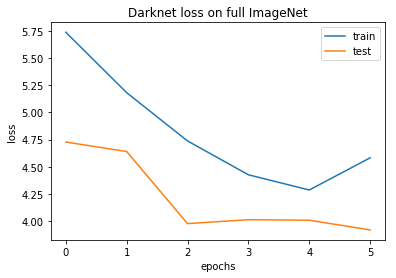

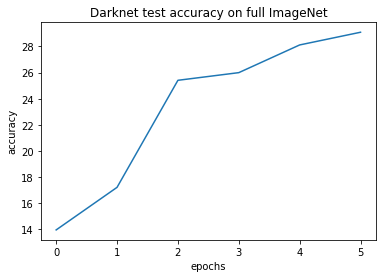

In [119]:
import matplotlib.pyplot as plt

plt.title('Darknet loss on full ImageNet')
plt.plot(range(0, 6), train_losses[:6], label='train')
plt.plot(range(0, 6), test_losses[:6], label='test')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
#plt.savefig(DATA_PATH + 'full-loss.png')

plt.clf()
plt.title('Darknet test accuracy on full ImageNet')
plt.plot(range(0, 6), test_accs[:6])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
#plt.savefig(DATA_PATH + 'bad-acc.png')

# Part 7: Short answer questions
Please answer these questions, and put the answers in a file called homework1_python.pdf in your repository.

# Tiny ImageNet
1. What design that you tried worked the best? This includes things like network design, learning rate, batch size, number of epochs, and other optimization parameters, data augmentation etc. What was the final train loss? Test loss? Test Accuracy? Provide the plots for train loss, test loss, and test accuracy.
2. What design worked the worst (but still performed better than random chance)? Provide all the same information as question 1.

  The network I first tried was basically copied over from the conv_net that was provided to us in trymnist. This was 
without any hyperparameter tuning (so the default hyperparameters provided). This network gets stuck in a local minimum very early on and converges to guessing either computer keyboard or baboon for every image. As a result, it seems that the network becomes a pretty good binary classifier between computer keyboards and baboons, but otherwise does terribly.

  One thing that I suspect affected this result heavily was the lack of image transforms, in particular the squashing of values between 0 and 1.0 that ToTensor performs. Another thing that helped a lot was changing the loss function from softmax to log_softmax.

3. Why do you think the best one worked well and the worst one worked poorly.


# Full ImageNet
1. What design that you tried worked the best? How many epochs were you able to run it for? Provide the same information from Tiny ImageNet question 1.
2. Were you able to use larger/deeper networks on Full ImageNet than you used on Tiny ImageNet and increase accuracy? If so, why? If not, why not?
3. The real ImageNet dataset has significantly larger images. How would you change your network design if the images were twice as large? How about smaller than Tiny ImageNet (32x32)? How do you think your accuracy would change? This is open-ended, but we want a more thought-out answer than "I'd resize the images" or "I'd do a larger pooling stride." You don't have to write code to test your hypothesis.

Additionally, download your .ipynb and put it in your repository and name it homework1_colab.ipynb


In [114]:
import cv2

ImportError: No module named cv2